# Actividad 6: regresiones lineales.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

## Nueva York

In [682]:
cd = pd.read_csv('listings - New York_clean.csv')
# Quitamos el Unamed: 0
cd = cd.drop(['Unnamed: 0'], axis=1)
cd.head()

id  host_id  beds  bedrooms           source  \
0  2595     2845   1.0       0.0      city scrape   
1  6848    15991   1.0       2.0      city scrape   
2  6872    16104   1.0       1.0      city scrape   
3  6990    16800   1.0       1.0      city scrape   
4  7064    17297   1.0       1.0  previous scrape   

                                                name  \
0                    Skylit Midtown Castle Sanctuary   
1                   Only 2 stops to Manhattan studio   
2  Uptown Sanctuary w/ Private Bath (Month to Month)   
3                            UES Beautiful Blue Room   
4  Amazing location! Wburg. Large, bright & tranquil   

                                         description  \
0  Beautiful, spacious skylit studio in the heart...   
1  Comfortable studio apartment with super comfor...   
2  This charming distancing-friendly month-to-mon...   
3                    Beautiful peaceful healthy home   
4  Large, private loft-like room in a spacious 2-...   

                               neighborhood_overview      host_name  \
0  Centrally located in the heart of Manhattan ju...       Jennifer   
1                           No neighborhood_overview  Allen & Irina   
2  This sweet Harlem sanctuary is a 10-20 minute ...            Kae   
3  Location: Five minutes to Central Park, Museum...            Cyn   
4  - One stop from the East Village, Lower East S...         Joelle   

   host_since  ... number_of_reviews_ltm number_of_reviews_l30d  \
0  2008-09-09  ...                   0.0                    0.0   
1  2009-05-06  ...                   0.3                    0.0   
2  2009-05-07  ...                   0.0                    0.0   
3  2009-05-12  ...                   0.3                    0.0   
4  2009-05-15  ...                   0.0                    0.0   

  review_scores_rating review_scores_accuracy review_scores_cleanliness  \
0                 4.68                   4.73                      4.63   
1                 4.58                   4.59                      4.85   
2                 5.00                   5.00                      5.00   
3                 4.88                   4.83                      4.95   
4                 4.91                   5.00                      4.91   

  review_scores_checkin review_scores_communication review_scores_location  \
0                  4.77                        4.80                   4.81   
1                  4.85                        4.80                   4.69   
2                  5.00                        5.00                   5.00   
3                  4.96                        4.95                   4.85   
4                  5.00                        5.00                   5.00   

  review_scores_value reviews_per_month  
0                4.40              0.27  
1                4.58              1.04  
2                5.00              0.03  
3                4.85              1.37  
4                5.00              0.08  

[5 rows x 48 columns]

In [683]:
# Transformamos algunas variables para su tratamiento

# Transformamos host_response_rate a float
# Los No data los quitamos
cd = cd[cd['host_acceptance_rate'] != 'No data']
cd['host_acceptance_rate'] = cd['host_acceptance_rate'].str.replace('%', '').astype(float)

# Pasamos host_is_superhost a entero, donde t es 1 y f es 0
cd['host_is_superhost'] = cd['host_is_superhost'].replace({'t': 1, 'f': 0})
cd['host_is_superhost'] = cd['host_is_superhost'].astype(int)

# Dado que no tenemos la variable bathrooms, la creamos usando bathrooms_text
# Quitaremos el texto y nos quedaremos solo con el número de la izquierda
cd['bathrooms'] = cd['bathrooms_text'].str.extract('(\d+\.?\d*)').astype(float)
# Quitamos los valores nulos
cd = cd[cd['bathrooms'].notnull()]

# Transformamos las variable instant_bookable a entero, donde t es 1 y f es 0
cd['instant_bookable'] = cd['instant_bookable'].replace({'t': 1, 'f': 0})

# Transformamos la variable host_identity_verified a entero, donde t es 1 y f es 0
cd['host_identity_verified'] = cd['host_identity_verified'].replace({'t': 1, 'f': 0})

# Pasamos a numérico la variable property_type
# Donde:
types = {
    'Entire rental unit': 1,
    'Private room in rental unit': 3,
    'Private room in home': 4,
    'Room in hotel': 2,
    'Private room in townhouse': 5,
    'Entire home': 6,
    'Entire condo': 7,
    'Entire townhouse': 8,
    }
cd['property_type'] = cd['property_type'].replace(types)

C:\Users\angel\AppData\Local\Temp\ipykernel_14752\1289578144.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cd['host_is_superhost'] = cd['host_is_superhost'].replace({'t': 1, 'f': 0})
C:\Users\angel\AppData\Local\Temp\ipykernel_14752\1289578144.py:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cd['instant_bookable'] = cd['instant_bookable'].replace({'t': 1, 'f': 0})
C:\Users\angel\AppData\Local\Temp\ipykernel_14752\1289578144.py:22: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a fut

In [684]:
# Vamos a separar en distintos dataframes los diferentes tipos de habitaciones
cd_entire = cd[cd['room_type'] == 'Entire home/apt']
cd_private = cd[cd['room_type'] == 'Private room']
cd_shared = cd[cd['room_type'] == 'Shared room']
cd_hotel = cd[cd['room_type'] == 'Hotel room']

print(cd_entire['room_type'].value_counts(), end='\n\n')
print(cd_private['room_type'].value_counts(), end='\n\n')
print(cd_shared['room_type'].value_counts(), end='\n\n')
print(cd_hotel['room_type'].value_counts(), end='\n\n')

room_type
Entire home/apt    12205
Name: count, dtype: int64

room_type
Private room    9623
Name: count, dtype: int64

room_type
Shared room    186
Name: count, dtype: int64

room_type
Hotel room    511
Name: count, dtype: int64



### x = host_acceptance_rate, y = price

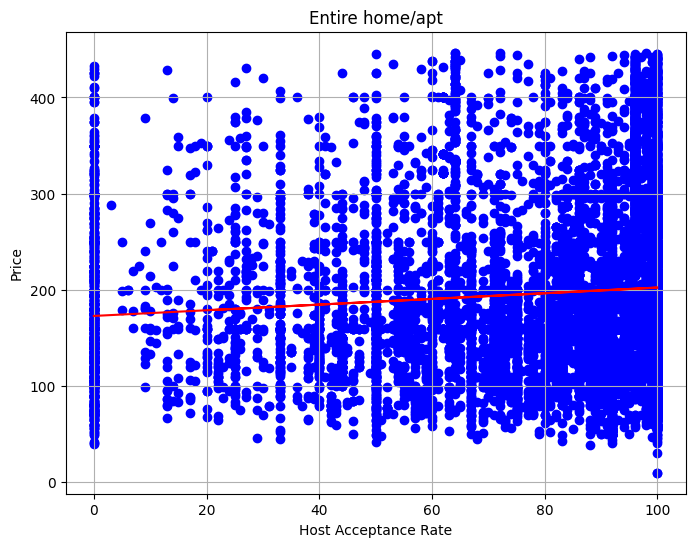

In [685]:
# Ahora, vamos a realizar una regresión lineal usando cada df de habitaciones con respecto al precio y host_acceptance_rate.
# Ponemos el precio como variable dependiente y el host_acceptance_rate como variable independiente.

model = LinearRegression()
model.fit(cd_entire[['host_acceptance_rate']], cd_entire['price'])

# Hacemos la gráfica de la regresión lineal
plt.figure(figsize=(8, 6))
plt.scatter(cd_entire[['host_acceptance_rate']], cd_entire['price'], color='blue')
plt.plot(cd_entire[['host_acceptance_rate']], model.predict(cd_entire[['host_acceptance_rate']]), color='red')
plt.title('Entire home/apt')
plt.xlabel('Host Acceptance Rate')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [686]:
# Sacamos los parámetros de la regresión lineal con su puntaje
# Obtenemos los parámetros
m = model.coef_
b = model.intercept_
print('Pendiente:', m)
print('Intercepto:', b)

# Entonces, el modelo lineal sería:
print(f'y = {m[0]}x + {b}', end='\n\n')

print('Puntaje del modelo:', model.score(cd_entire[['host_acceptance_rate']], cd_entire['price']))

Pendiente: [0.29493639]
Intercepto: 172.9425121954105
y = 0.2949363912914712x + 172.9425121954105

Puntaje del modelo: 0.008954866023994423


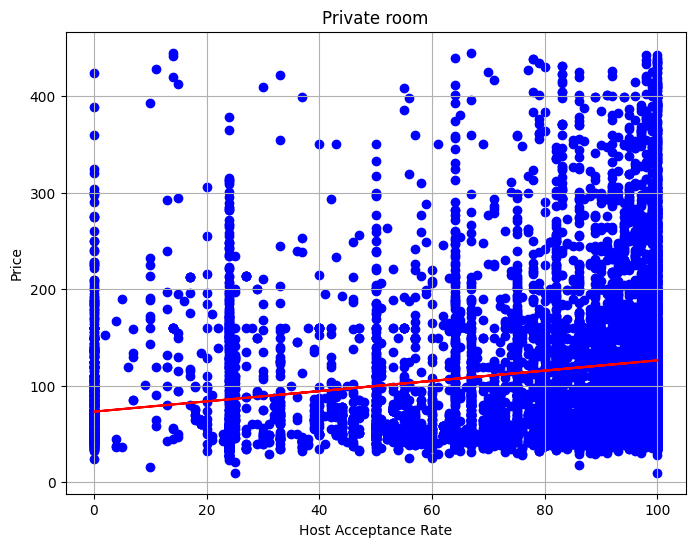

In [687]:
# Haremos lo mismo para los otros tipos de habitaciones
model = LinearRegression()
model.fit(cd_private[['host_acceptance_rate']], cd_private['price'])
plt.figure(figsize=(8, 6))
plt.scatter(cd_private[['host_acceptance_rate']], cd_private['price'], color='blue')
plt.plot(cd_private[['host_acceptance_rate']], model.predict(cd_private[['host_acceptance_rate']]), color='red')
plt.title('Private room')
plt.xlabel('Host Acceptance Rate')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [688]:
# Obtenemos los parámetros
m = model.coef_
b = model.intercept_
print('Pendiente:', m)
print('Intercepto:', b)

# Entonce, el modelo lineal sería:
print(f'y = {m[0]}x + {b}', end='\n\n')

print('Puntaje del modelo:', model.score(cd_private[['host_acceptance_rate']], cd_private['price']))

Pendiente: [0.53122942]
Intercepto: 73.26018155777197
y = 0.5312294212571803x + 73.26018155777197

Puntaje del modelo: 0.039417987610363414


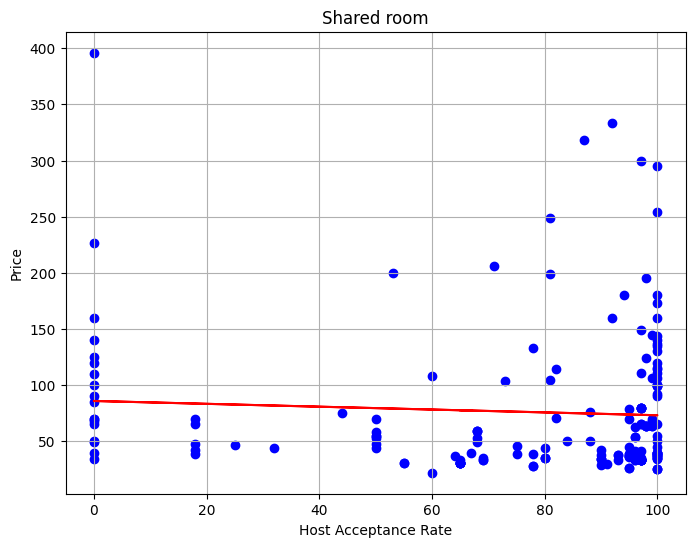

In [689]:
# Shared room
model = LinearRegression()
model.fit(cd_shared[['host_acceptance_rate']], cd_shared['price'])
plt.figure(figsize=(8, 6))
plt.scatter(cd_shared[['host_acceptance_rate']], cd_shared['price'], color='blue')
plt.plot(cd_shared[['host_acceptance_rate']], model.predict(cd_shared[['host_acceptance_rate']]), color='red')
plt.title('Shared room')
plt.xlabel('Host Acceptance Rate')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [690]:
# Obtenemos los parámetros
m = model.coef_
b = model.intercept_
print('Pendiente:', m)
print('Intercepto:', b)

# Entonce, el modelo lineal sería:
print(f'y = {m[0]}x + {b}', end='\n\n')

print('Puntaje del modelo:', model.score(cd_shared[['host_acceptance_rate']], cd_shared['price']))

Pendiente: [-0.12728277]
Intercepto: 85.89733156896064
y = -0.12728277150359738x + 85.89733156896064

Puntaje del modelo: 0.0040635236586586965


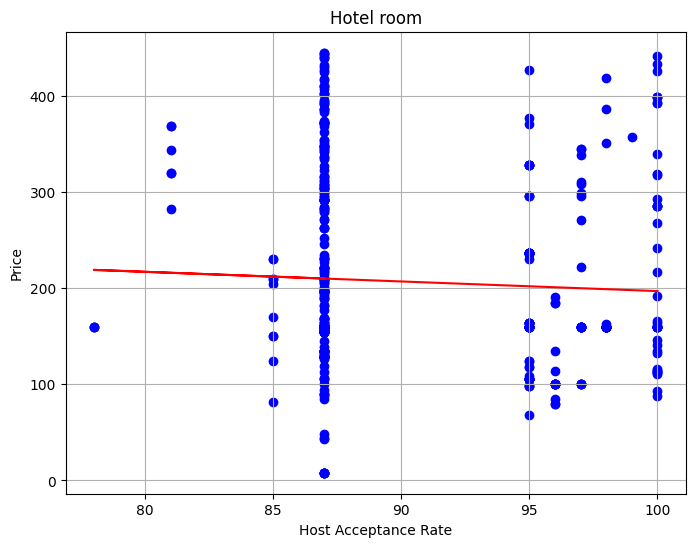

In [691]:
# Hotel room
model = LinearRegression()
model.fit(cd_hotel[['host_acceptance_rate']], cd_hotel['price'])
plt.figure(figsize=(8, 6))
plt.scatter(cd_hotel[['host_acceptance_rate']], cd_hotel['price'], color='blue')
plt.plot(cd_hotel[['host_acceptance_rate']], model.predict(cd_hotel[['host_acceptance_rate']]), color='red')
plt.title('Hotel room')
plt.xlabel('Host Acceptance Rate')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [692]:
# Obtenemos los parámetros
m = model.coef_
b = model.intercept_
print('Pendiente:', m)
print('Intercepto:', b)

# Entonce, el modelo lineal sería:
print(f'y = {m[0]}x + {b}', end='\n\n')

print('Puntaje del modelo:', model.score(cd_hotel[['host_acceptance_rate']], cd_hotel['price']))

Pendiente: [-1.00385759]
Intercepto: 297.3573015759016
y = -1.0038575896452795x + 297.3573015759016

Puntaje del modelo: 0.002883782645606514


### x = host_is_superhost, y = price

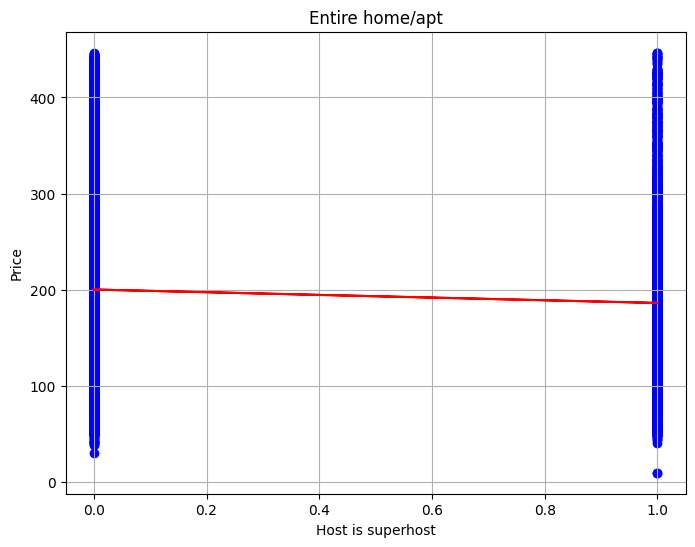

In [693]:
# Ahora, vamos a realizar una regresión lineal usando cada df de habitaciones con respecto al precio y host_is_superhost.

# Entire home/apt
model = LinearRegression()
model.fit(cd_entire[['host_is_superhost']], cd_entire['price'])
plt.figure(figsize=(8, 6))
plt.scatter(cd_entire[['host_is_superhost']], cd_entire['price'], color='blue')
plt.plot(cd_entire[['host_is_superhost']], model.predict(cd_entire[['host_is_superhost']]), color='red')
plt.title('Entire home/apt')
plt.xlabel('Host is superhost')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [694]:
# Obtenemos los parámetros
m = model.coef_
b = model.intercept_
print('Pendiente:', m)
print('Intercepto:', b)

# Entonce, el modelo lineal sería:
print(f'y = {m[0]}x + {b}', end='\n\n')

print('Puntaje del modelo:', model.score(cd_entire[['host_is_superhost']], cd_entire['price']))

Pendiente: [-13.95244937]
Intercepto: 200.39080918564264
y = -13.95244937494541x + 200.39080918564264

Puntaje del modelo: 0.005347372637710013


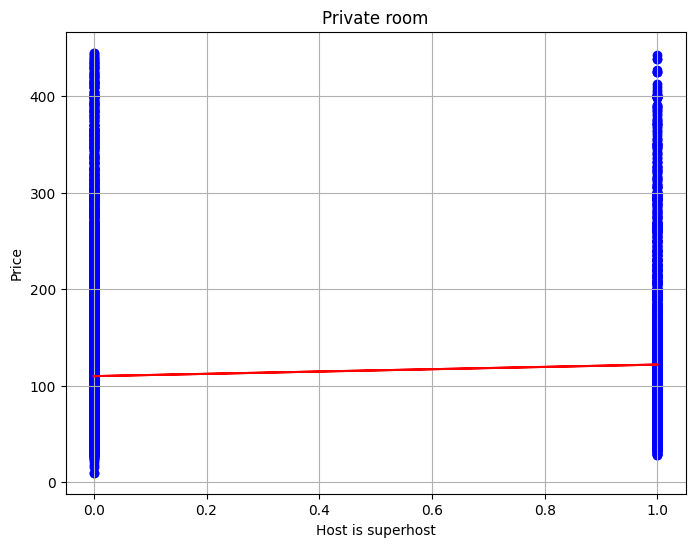

In [695]:
# Private room
model = LinearRegression()
model.fit(cd_private[['host_is_superhost']], cd_private['price'])
plt.figure(figsize=(8, 6))
plt.scatter(cd_private[['host_is_superhost']], cd_private['price'], color='blue')
plt.plot(cd_private[['host_is_superhost']], model.predict(cd_private[['host_is_superhost']]), color='red')
plt.title('Private room')
plt.xlabel('Host is superhost')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [696]:
# Obtenemos los parámetros
m = model.coef_
b = model.intercept_
print('Pendiente:', m)
print('Intercepto:', b)

# Entonce, el modelo lineal sería:
print(f'y = {m[0]}x + {b}', end='\n\n')

print('Puntaje del modelo:', model.score(cd_private[['host_is_superhost']], cd_private['price']))

Pendiente: [11.97262852]
Intercepto: 110.02381921619865
y = 11.97262851669077x + 110.02381921619865

Puntaje del modelo: 0.004605179224768441


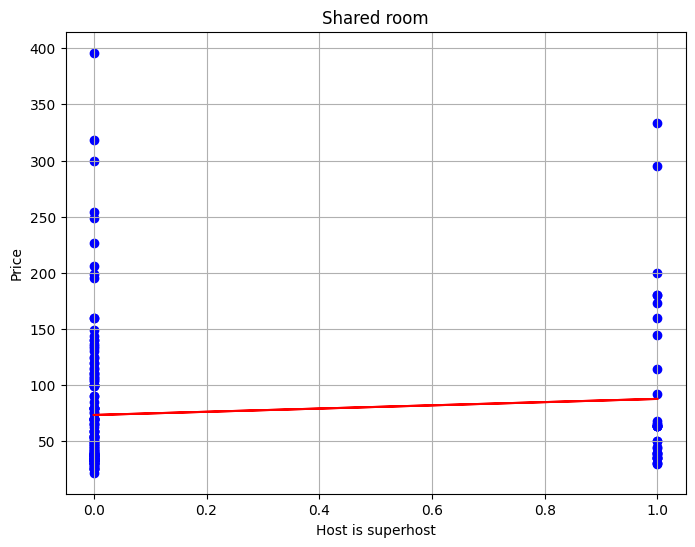

In [697]:
# Shared room
model = LinearRegression()
model.fit(cd_shared[['host_is_superhost']], cd_shared['price'])
plt.figure(figsize=(8, 6))
plt.scatter(cd_shared[['host_is_superhost']], cd_shared['price'], color='blue')
plt.plot(cd_shared[['host_is_superhost']], model.predict(cd_shared[['host_is_superhost']]), color='red')
plt.title('Shared room')
plt.xlabel('Host is superhost')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [698]:
# Obtenemos los parámetros
m = model.coef_
b = model.intercept_
print('Pendiente:', m)

# Entonce, el modelo lineal sería:
print(f'y = {m[0]}x + {b}', end='\n\n')

print('Puntaje del modelo:', model.score(cd_shared[['host_is_superhost']], cd_shared['price']))

Pendiente: [14.33620467]
y = 14.336204667297391x + 73.40093818984548

Puntaje del modelo: 0.007873190457873935


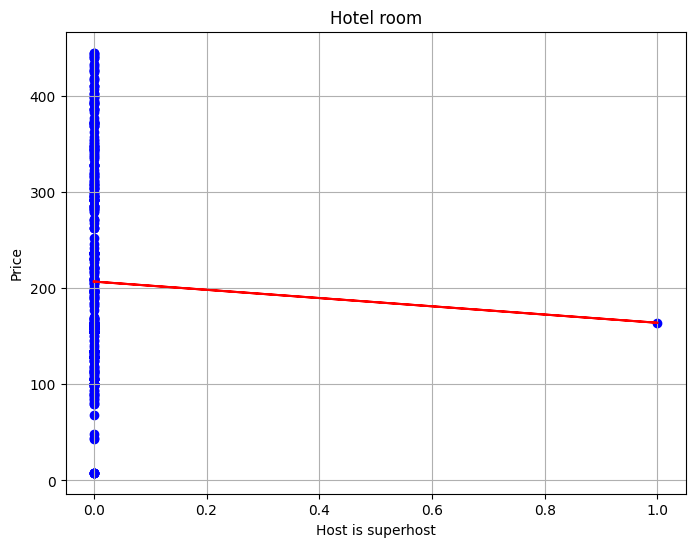

In [699]:
# Hotel room
model = LinearRegression()
model.fit(cd_hotel[['host_is_superhost']], cd_hotel['price'])
plt.figure(figsize=(8, 6))
plt.scatter(cd_hotel[['host_is_superhost']], cd_hotel['price'], color='blue')
plt.plot(cd_hotel[['host_is_superhost']], model.predict(cd_hotel[['host_is_superhost']]), color='red')
plt.title('Hotel room')
plt.xlabel('Host is superhost')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [700]:
# Obtenemos los parámetros
m = model.coef_
b = model.intercept_
print('Pendiente:', m)
print('Intercepto:', b)

# Entonce, el modelo lineal sería:
print(f'y = {m[0]}x + {b}', end='\n\n')

print('Puntaje del modelo:', model.score(cd_hotel[['host_is_superhost']], cd_hotel['price']))

Pendiente: [-42.89761725]
Intercepto: 206.897617252029
y = -42.89761725202832x + 206.897617252029

Puntaje del modelo: 0.00040094354826569756


### x = bathrooms, y = accomodates

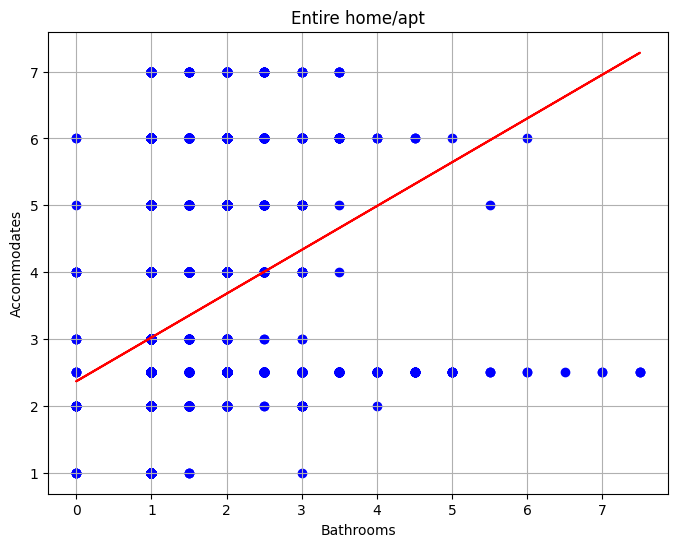

In [701]:
# Ahora, vamos a realizar una regresión lineal usando cada df de habitaciones con respecto al accoomodates y bathrooms.
# Ponemos los baños como variable independiente y el número de acomodados como variable dependiente.

# Entire home/apt
model = LinearRegression()
model.fit(cd_entire[['bathrooms']], cd_entire['accommodates'])
plt.figure(figsize=(8, 6))
plt.scatter(cd_entire[['bathrooms']], cd_entire['accommodates'], color='blue')
plt.plot(cd_entire[['bathrooms']], model.predict(cd_entire[['bathrooms']]), color='red')
plt.title('Entire home/apt')
plt.xlabel('Bathrooms')
plt.ylabel('Accommodates')
plt.grid(True)
plt.show()

In [702]:
# Obtenemos los parámetros
m = model.coef_
b = model.intercept_
print('Pendiente:', m)
print('Intercepto:', b)

# Entonce, el modelo lineal sería:
print(f'y = {m[0]}x + {b}', end='\n\n')

print('Puntaje del modelo:', model.score(cd_entire[['bathrooms']], cd_entire['accommodates']))

Pendiente: [0.65514385]
Intercepto: 2.3680616084180857
y = 0.6551438523602033x + 2.3680616084180857

Puntaje del modelo: 0.05886849064313193


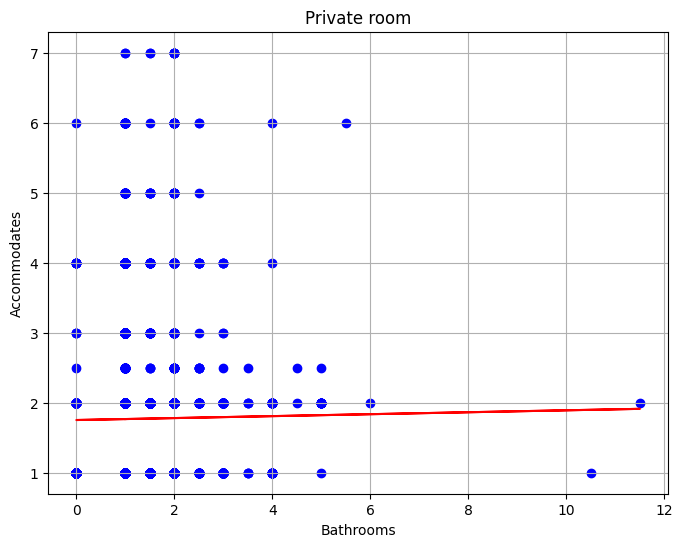

In [703]:
# Private room
model = LinearRegression()
model.fit(cd_private[['bathrooms']], cd_private['accommodates'])
plt.figure(figsize=(8, 6))
plt.scatter(cd_private[['bathrooms']], cd_private['accommodates'], color='blue')
plt.plot(cd_private[['bathrooms']], model.predict(cd_private[['bathrooms']]), color='red')
plt.title('Private room')
plt.xlabel('Bathrooms')
plt.ylabel('Accommodates')
plt.grid(True)
plt.show()

In [704]:
# Obtenemos los parámetros
m = model.coef_
b = model.intercept_
print('Pendiente:', m)
print('Intercepto:', b)

# Entonce, el modelo lineal sería:
print(f'y = {m[0]}x + {b}', end='\n\n')

print('Puntaje del modelo:', model.score(cd_private[['bathrooms']], cd_private['accommodates']))

Pendiente: [0.01389936]
Intercepto: 1.7527571898243561
y = 0.013899361441146998x + 1.7527571898243561

Puntaje del modelo: 9.465814853293342e-05


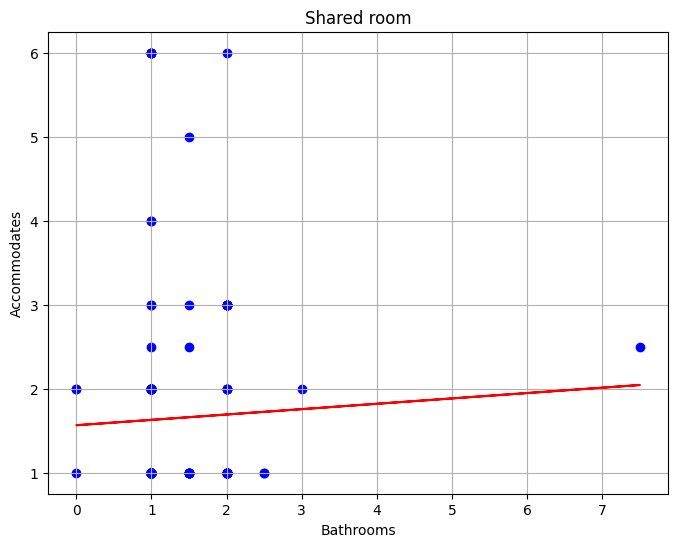

In [705]:
# Shared room
model = LinearRegression()
model.fit(cd_shared[['bathrooms']], cd_shared['accommodates'])
plt.figure(figsize=(8, 6))
plt.scatter(cd_shared[['bathrooms']], cd_shared['accommodates'], color='blue')
plt.plot(cd_shared[['bathrooms']], model.predict(cd_shared[['bathrooms']]), color='red')
plt.title('Shared room')
plt.xlabel('Bathrooms')
plt.ylabel('Accommodates')
plt.grid(True)
plt.show()

In [706]:
# Obtenemos los parámetros
m = model.coef_
b = model.intercept_
print('Pendiente:', m)
print('Intercepto:', b)

# Entonce, el modelo lineal sería:
print(f'y = {m[0]}x + {b}', end='\n\n')

print('Puntaje del modelo:', model.score(cd_shared[['bathrooms']], cd_shared['accommodates']))

Pendiente: [0.06387975]
Intercepto: 1.5652522613397715
y = 0.06387974798670486x + 1.5652522613397715

Puntaje del modelo: 0.0015594801877728548


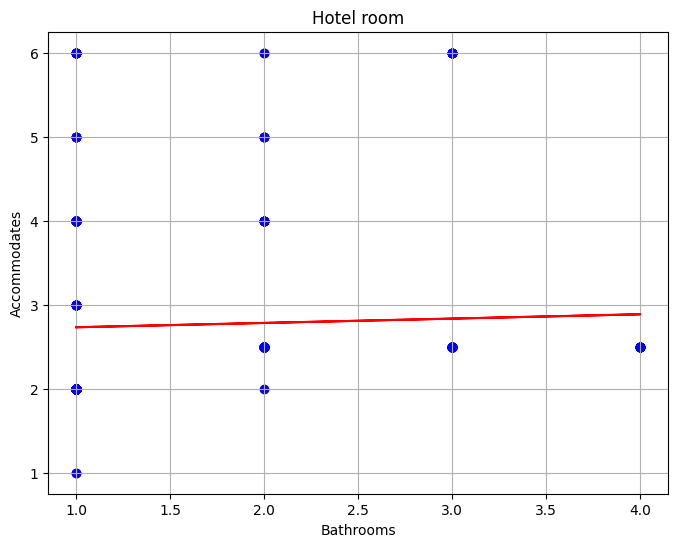

In [707]:
# Hotel room
model = LinearRegression()
model.fit(cd_hotel[['bathrooms']], cd_hotel['accommodates'])
plt.figure(figsize=(8, 6))
plt.scatter(cd_hotel[['bathrooms']], cd_hotel['accommodates'], color='blue')
plt.plot(cd_hotel[['bathrooms']], model.predict(cd_hotel[['bathrooms']]), color='red')
plt.title('Hotel room')
plt.xlabel('Bathrooms')
plt.ylabel('Accommodates')
plt.grid(True)
plt.show()

In [708]:
# Obtenemos los parámetros
m = model.coef_
b = model.intercept_
print('Pendiente:', m)
print('Intercepto:', b)

# Entonce, el modelo lineal sería:
print(f'y = {m[0]}x + {b}', end='\n\n')

print('Puntaje del modelo:', model.score(cd_hotel[['bathrooms']], cd_hotel['accommodates']))

Pendiente: [0.05153506]
Intercepto: 2.680056340414717
y = 0.05153506449494823x + 2.680056340414717

Puntaje del modelo: 0.001678120398136529


### x = review_score_cleanliness, y = price

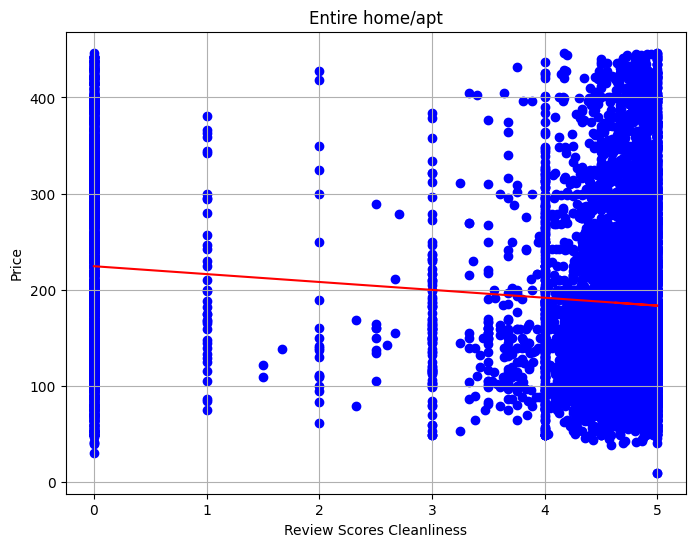

In [709]:
# Seguimos, pero ahora con review_score_cleanliness y price

# Entire home/apt
model = LinearRegression()
model.fit(cd_entire[['review_scores_cleanliness']], cd_entire['price'])
plt.figure(figsize=(8, 6))
plt.scatter(cd_entire[['review_scores_cleanliness']], cd_entire['price'], color='blue')
plt.plot(cd_entire[['review_scores_cleanliness']], model.predict(cd_entire[['review_scores_cleanliness']]), color='red')
plt.title('Entire home/apt')
plt.xlabel('Review Scores Cleanliness')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [710]:
# Obtenemos los parámetros
m = model.coef_
b = model.intercept_
print('Pendiente:', m)

# Entonce, el modelo lineal sería:
print(f'y = {m[0]}x + {b}', end='\n\n')

print('Puntaje del modelo:', model.score(cd_entire[['review_scores_cleanliness']], cd_entire['price']))

Pendiente: [-8.19444077]
y = -8.19444077170333x + 224.62641535222764

Puntaje del modelo: 0.036890446671605015


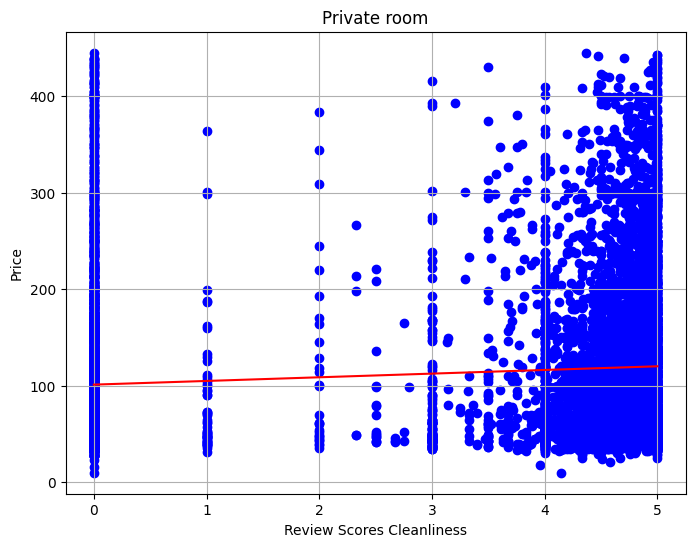

In [711]:
# Private room
model = LinearRegression()
model.fit(cd_private[['review_scores_cleanliness']], cd_private['price'])
plt.figure(figsize=(8, 6))
plt.scatter(cd_private[['review_scores_cleanliness']], cd_private['price'], color='blue')
plt.plot(cd_private[['review_scores_cleanliness']], model.predict(cd_private[['review_scores_cleanliness']]), color='red')
plt.title('Private room')
plt.xlabel('Review Scores Cleanliness')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [712]:
# Obtenemos los parámetros
m = model.coef_
b = model.intercept_
print('Pendiente:', m)

# Entonce, el modelo lineal sería:
print(f'y = {m[0]}x + {b}', end='\n\n')

print('Puntaje del modelo:', model.score(cd_private[['review_scores_cleanliness']], cd_private['price']))

Pendiente: [3.79872271]
y = 3.798722708649531x + 101.24952977188177

Puntaje del modelo: 0.010933617034038279


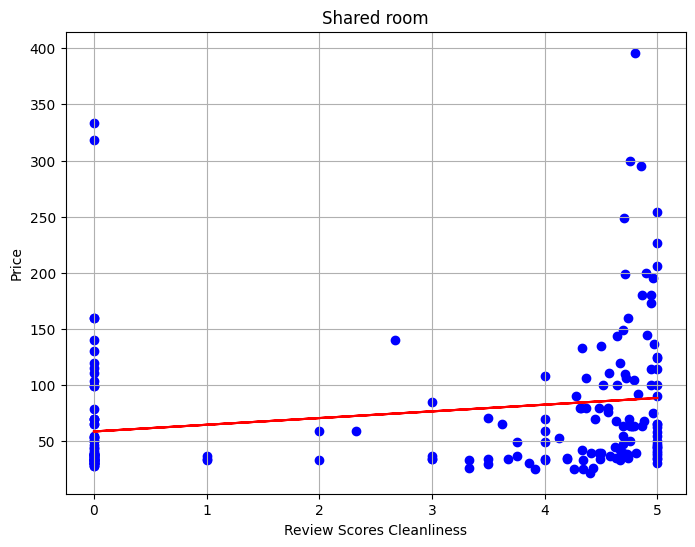

In [713]:
# Shared room
model = LinearRegression()
model.fit(cd_shared[['review_scores_cleanliness']], cd_shared['price'])
plt.figure(figsize=(8, 6))
plt.scatter(cd_shared[['review_scores_cleanliness']], cd_shared['price'], color='blue')
plt.plot(cd_shared[['review_scores_cleanliness']], model.predict(cd_shared[['review_scores_cleanliness']]), color='red')
plt.title('Shared room')
plt.xlabel('Review Scores Cleanliness')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [714]:
# Obtenemos los parámetros
m = model.coef_
b = model.intercept_
print('Pendiente:', m)

# Entonce, el modelo lineal sería:
print(f'y = {m[0]}x + {b}', end='\n\n')

print('Puntaje del modelo:', model.score(cd_shared[['review_scores_cleanliness']], cd_shared['price']))

Pendiente: [5.96462251]
y = 5.964622507142897x + 58.73899418628996

Puntaje del modelo: 0.04187278725115018


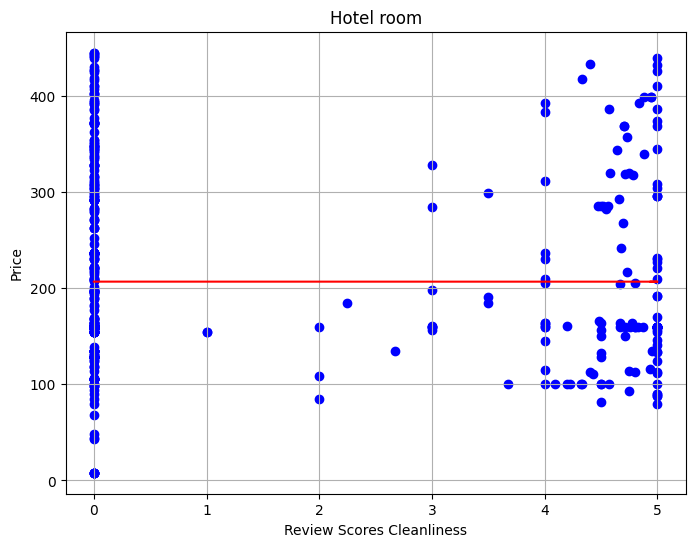

In [715]:
# Hotel room
model = LinearRegression()
model.fit(cd_hotel[['review_scores_cleanliness']], cd_hotel['price'])
plt.figure(figsize=(8, 6))
plt.scatter(cd_hotel[['review_scores_cleanliness']], cd_hotel['price'], color='blue')
plt.plot(cd_hotel[['review_scores_cleanliness']], model.predict(cd_hotel[['review_scores_cleanliness']]), color='red')
plt.title('Hotel room')
plt.xlabel('Review Scores Cleanliness')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [716]:
# Obtenemos los parámetros
m = model.coef_
b = model.intercept_
print('Pendiente:', m)
print('Intercepto:', b)

# Entonce, el modelo lineal sería:
print(f'y = {m[0]}x + {b}', end='\n\n')

print('Puntaje del modelo:', model.score(cd_hotel[['review_scores_cleanliness']], cd_hotel['price']))

Pendiente: [-0.00768503]
Intercepto: 206.8240202045682
y = -0.0076850252067501715x + 206.8240202045682

Puntaje del modelo: 2.8937258811367883e-08


### host_idendity_verified, y = price

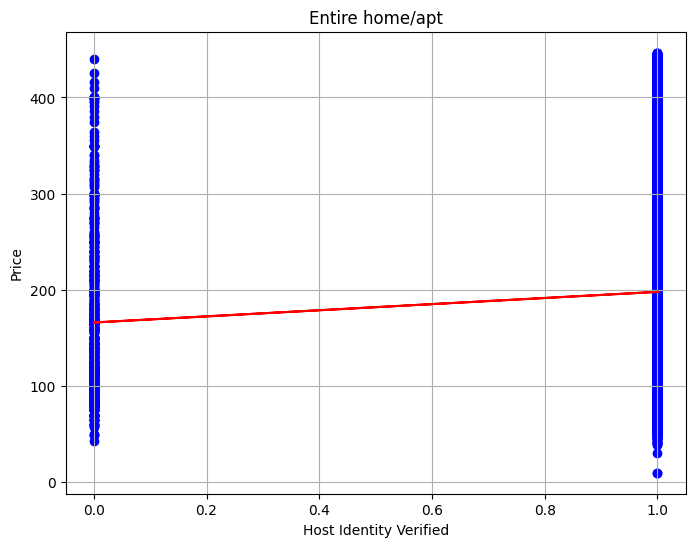

In [717]:
# Seguimos con host_identity_verified como independiente y price como dependiente

# Entire home/apt
model = LinearRegression()
model.fit(cd_entire[['host_identity_verified']], cd_entire['price'])
plt.figure(figsize=(8, 6))
plt.scatter(cd_entire[['host_identity_verified']], cd_entire['price'], color='blue')
plt.plot(cd_entire[['host_identity_verified']], model.predict(cd_entire[['host_identity_verified']]), color='red')
plt.title('Entire home/apt')
plt.xlabel('Host Identity Verified')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [718]:
# Obtenemos los parámetros
m = model.coef_
b = model.intercept_
print('Pendiente:', m)
print('Intercepto:', b)

# Entonce, el modelo lineal sería:
print(f'y = {m[0]}x + {b}', end='\n\n')

print('Puntaje del modelo:', model.score(cd_entire[['host_identity_verified']], cd_entire['price']))

Pendiente: [31.82439154]
Intercepto: 166.1304829256752
y = 31.82439154451236x + 166.1304829256752

Puntaje del modelo: 0.007596477170287885


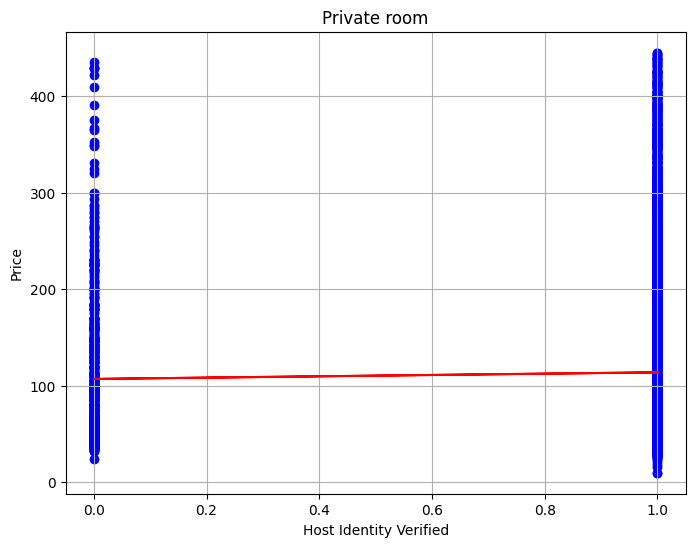

In [719]:
# Private room
model = LinearRegression()
model.fit(cd_private[['host_identity_verified']], cd_private['price'])
plt.figure(figsize=(8, 6))
plt.scatter(cd_private[['host_identity_verified']], cd_private['price'], color='blue')
plt.plot(cd_private[['host_identity_verified']], model.predict(cd_private[['host_identity_verified']]), color='red')
plt.title('Private room')
plt.xlabel('Host Identity Verified')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [720]:
# Obtenemos los parámetros
m = model.coef_
b = model.intercept_
print('Pendiente:', m)
print('Intercepto:', b)

# Entonce, el modelo lineal sería:
print(f'y = {m[0]}x + {b}', end='\n\n')

print('Puntaje del modelo:', model.score(cd_private[['host_identity_verified']], cd_private['price']))

Pendiente: [6.85068267]
Intercepto: 107.1205583248591
y = 6.850682668744481x + 107.1205583248591

Puntaje del modelo: 0.0005523813720689219


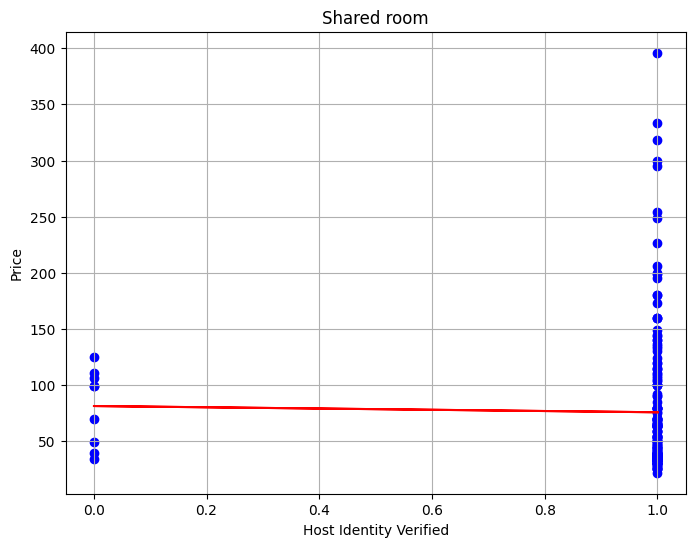

In [721]:
# Shared room
model = LinearRegression()
model.fit(cd_shared[['host_identity_verified']], cd_shared['price'])
plt.figure(figsize=(8, 6))
plt.scatter(cd_shared[['host_identity_verified']], cd_shared['price'], color='blue')
plt.plot(cd_shared[['host_identity_verified']], model.predict(cd_shared[['host_identity_verified']]), color='red')
plt.title('Shared room')
plt.xlabel('Host Identity Verified')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [722]:
# Obtenemos los parámetros
m = model.coef_
b = model.intercept_
print('Pendiente:', m)
print('Intercepto:', b)

# Entonce, el modelo lineal sería:
print(f'y = {m[0]}x + {b}', end='\n\n')

print('Puntaje del modelo:', model.score(cd_shared[['host_identity_verified']], cd_shared['price']))

Pendiente: [-5.55927495]
Intercepto: 81.38888888888889
y = -5.559274952919022x + 81.38888888888889

Puntaje del modelo: 0.00035685309261479503


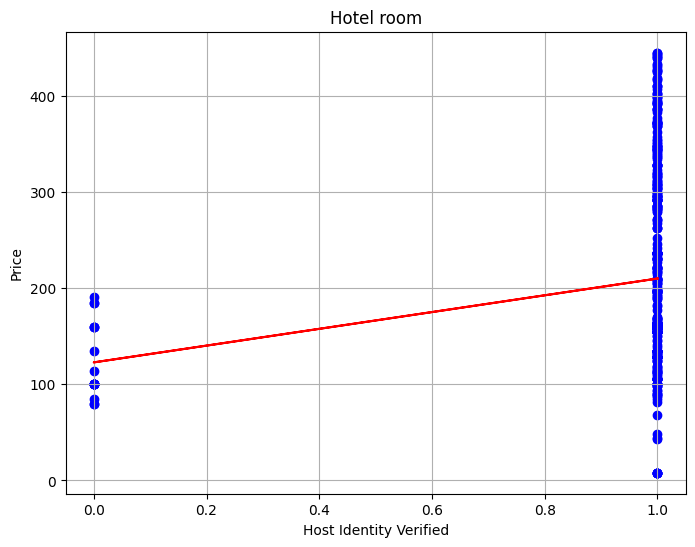

In [723]:
# Hotel room
model = LinearRegression()
model.fit(cd_hotel[['host_identity_verified']], cd_hotel['price'])
plt.figure(figsize=(8, 6))
plt.scatter(cd_hotel[['host_identity_verified']], cd_hotel['price'], color='blue')
plt.plot(cd_hotel[['host_identity_verified']], model.predict(cd_hotel[['host_identity_verified']]), color='red')
plt.title('Hotel room')
plt.xlabel('Host Identity Verified')
plt.ylabel('Price')
plt.grid(True)
plt.show()


In [724]:
# Obtenemos los parámetros
m = model.coef_
b = model.intercept_
print('Pendiente:', m)
print('Intercepto:', b)

# Entonce, el modelo lineal sería:
print(f'y = {m[0]}x + {b}', end='\n\n')

print('Puntaje del modelo:', model.score(cd_hotel[['host_identity_verified']], cd_hotel['price']))

Pendiente: [87.24716636]
Intercepto: 122.81052631578933
y = 87.24716636415944x + 122.81052631578933

Puntaje del modelo: 0.030399614661050012


### x = instant_bookable, y = price

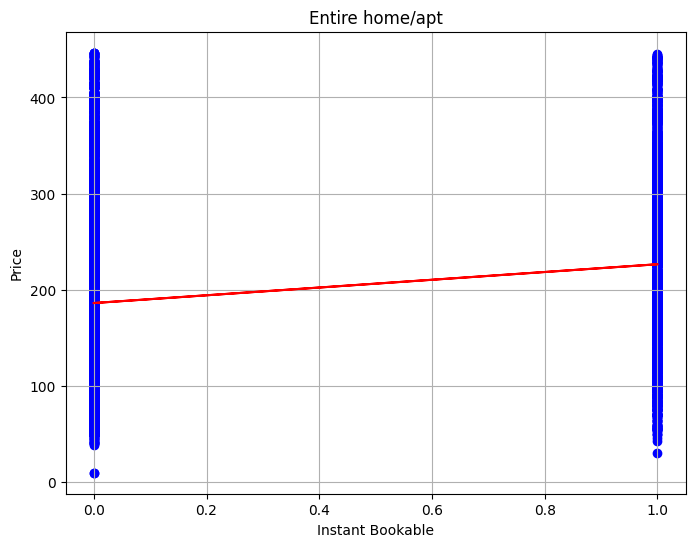

In [725]:
# Seguimos, pero ahora con instant_bookable y price

# Entire home/apt
model = LinearRegression()
model.fit(cd_entire[['instant_bookable']], cd_entire['price'])
plt.figure(figsize=(8, 6))
plt.scatter(cd_entire[['instant_bookable']], cd_entire['price'], color='blue')
plt.plot(cd_entire[['instant_bookable']], model.predict(cd_entire[['instant_bookable']]), color='red')
plt.title('Entire home/apt')
plt.xlabel('Instant Bookable')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [726]:
# Obtenemos los parámetros
m = model.coef_
b = model.intercept_
print('Pendiente:', m)
print('Intercepto:', b)

# Entonce, el modelo lineal sería:
print(f'y = {m[0]}x + {b}', end='\n\n')

print('Puntaje del modelo:', model.score(cd_entire[['instant_bookable']], cd_entire['price']))

Pendiente: [40.33146226]
Intercepto: 186.33639974776864
y = 40.331462258504786x + 186.33639974776864

Puntaje del modelo: 0.03730869883551502


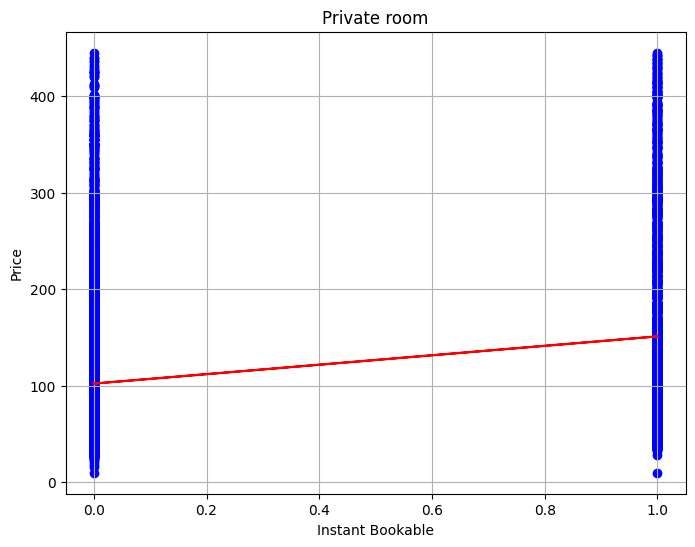

In [727]:
# Private room
model = LinearRegression()
model.fit(cd_private[['instant_bookable']], cd_private['price'])
plt.figure(figsize=(8, 6))
plt.scatter(cd_private[['instant_bookable']], cd_private['price'], color='blue')
plt.plot(cd_private[['instant_bookable']], model.predict(cd_private[['instant_bookable']]), color='red')
plt.title('Private room')
plt.xlabel('Instant Bookable')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [728]:
# Obtenemos los parámetros
m = model.coef_
b = model.intercept_
print('Pendiente:', m)
print('Intercepto:', b)

# Entonce, el modelo lineal sería:
print(f'y = {m[0]}x + {b}', end='\n\n')

print('Puntaje del modelo:', model.score(cd_private[['instant_bookable']], cd_private['price']))

Pendiente: [48.88751942]
Intercepto: 102.31625692172528
y = 48.88751941635374x + 102.31625692172528

Puntaje del modelo: 0.06635730647208615


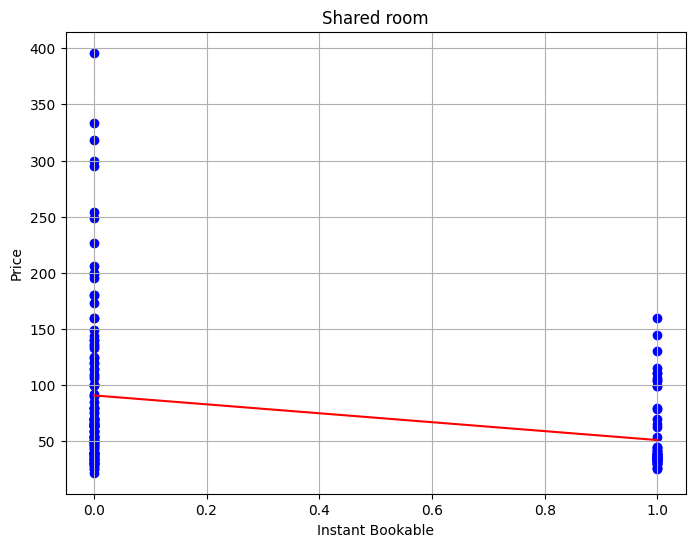

In [729]:
# Shared room
model = LinearRegression()
model.fit(cd_shared[['instant_bookable']], cd_shared['price'])
plt.figure(figsize=(8, 6))
plt.scatter(cd_shared[['instant_bookable']], cd_shared['price'], color='blue')
plt.plot(cd_shared[['instant_bookable']], model.predict(cd_shared[['instant_bookable']]), color='red')
plt.title('Shared room')
plt.xlabel('Instant Bookable')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [730]:
# Obtenemos los parámetros
m = model.coef_
b = model.intercept_
print('Pendiente:', m)
print('Intercepto:', b)

# Entonces, el modelo lineal sería:
print(f'y = {m[0]}x + {b}', end='\n\n')

print('Puntaje del modelo:', model.score(cd_shared[['instant_bookable']], cd_shared['price']))

Pendiente: [-39.7667255]
Intercepto: 90.85078347578346
y = -39.76672550476896x + 90.85078347578346

Puntaje del modelo: 0.09253627142121013


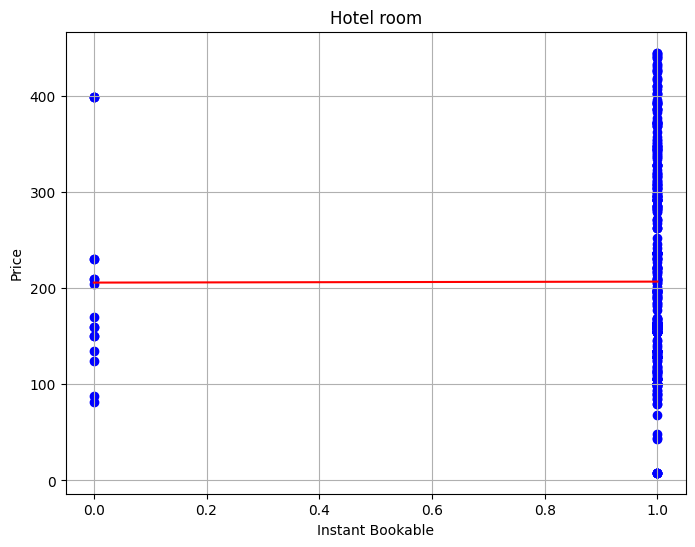

In [731]:
# Hotel room
model = LinearRegression()
model.fit(cd_hotel[['instant_bookable']], cd_hotel['price'])
plt.figure(figsize=(8, 6))
plt.scatter(cd_hotel[['instant_bookable']], cd_hotel['price'], color='blue')
plt.plot(cd_hotel[['instant_bookable']], model.predict(cd_hotel[['instant_bookable']]), color='red')
plt.title('Hotel room')
plt.xlabel('Instant Bookable')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [732]:
# Obtenemos los parámetros
m = model.coef_
b = model.intercept_
print('Pendiente:', m)
print('Intercepto:', b)

# Entonces, el modelo lineal sería:
print(f'y = {m[0]}x + {b}', end='\n\n')

print('Puntaje del modelo:', model.score(cd_hotel[['instant_bookable']], cd_hotel['price']))

Pendiente: [1.02247459]
Intercepto: 205.82521008403344
y = 1.0224745862220828x + 205.82521008403344

Puntaje del modelo: 3.750832137328075e-06


### x = property_type, y = price

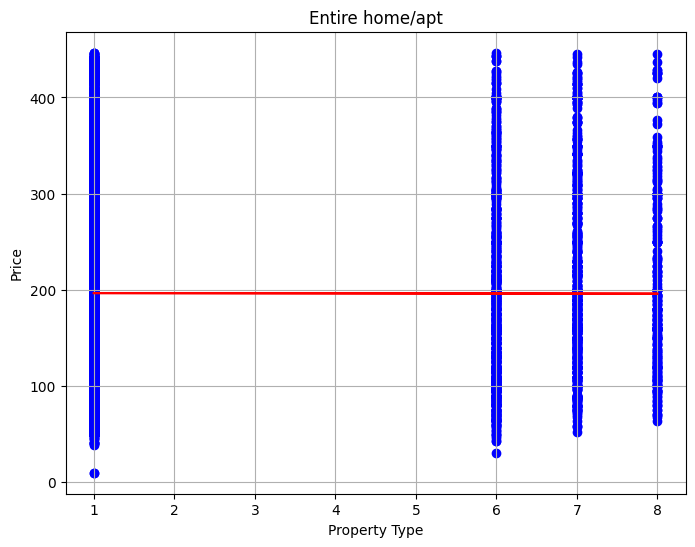

In [733]:
# Hacemos lo mismo, pero ahora con property_type y price

# Entire home/apt
model = LinearRegression()

# Filtramos ny_entire para quitar todos los valores en los que property_type no sea numérico
cd_entire_num = cd_entire[pd.to_numeric(cd_entire['property_type'], errors='coerce').notnull()]

model.fit(cd_entire_num[['property_type']], cd_entire_num['price'])
plt.figure(figsize=(8, 6))
plt.scatter(cd_entire_num[['property_type']], cd_entire_num['price'], color='blue')
plt.plot(cd_entire_num[['property_type']], model.predict(cd_entire_num[['property_type']]), color='red')
plt.title('Entire home/apt')
plt.xlabel('Property Type')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [734]:
# Obtenemos los parámetros
m = model.coef_
b = model.intercept_
print('Pendiente:', m)
print('Intercepto:', b)

# Entonces, el modelo lineal sería:
print(f'y = {m[0]}x + {b}', end='\n\n')

print('Puntaje del modelo:', model.score(cd_entire_num[['property_type']], cd_entire_num['price']))

Pendiente: [-0.08188501]
Intercepto: 196.74379112081962
y = -0.081885009054267x + 196.74379112081962

Puntaje del modelo: 3.9321499093469825e-06


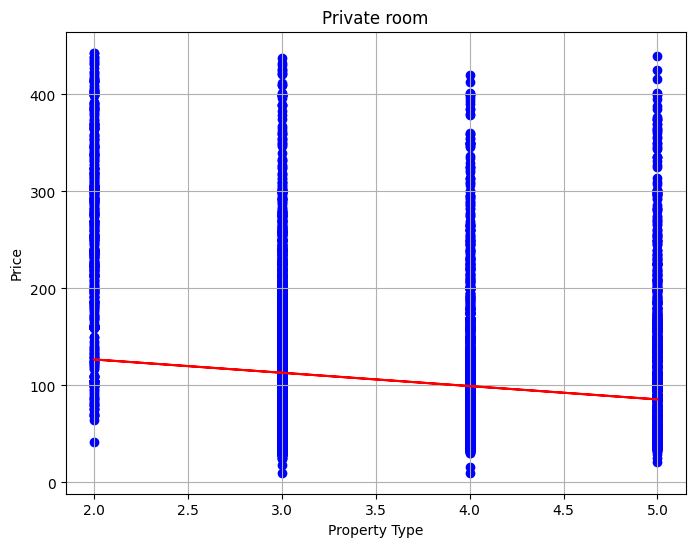

In [735]:
# Private room
model = LinearRegression()
cd_private_num = cd_private[pd.to_numeric(cd_private['property_type'], errors='coerce').notnull()]
model.fit(cd_private_num[['property_type']], cd_private_num['price'])
plt.figure(figsize=(8, 6))
plt.scatter(cd_private_num[['property_type']], cd_private_num['price'], color='blue')
plt.plot(cd_private_num[['property_type']], model.predict(cd_private_num[['property_type']]), color='red')
plt.title('Private room')
plt.xlabel('Property Type')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [736]:
# Obtenemos los parámetros
m = model.coef_
b = model.intercept_
print('Pendiente:', m)
print('Intercepto:', b)

# Entonces, el modelo lineal sería:
print(f'y = {m[0]}x + {b}', end='\n\n')

print('Puntaje del modelo:', model.score(cd_private_num[['property_type']], cd_private_num['price']))

Pendiente: [-13.72949639]
Intercepto: 154.25382607059805
y = -13.729496385126778x + 154.25382607059805

Puntaje del modelo: 0.0193051738139981


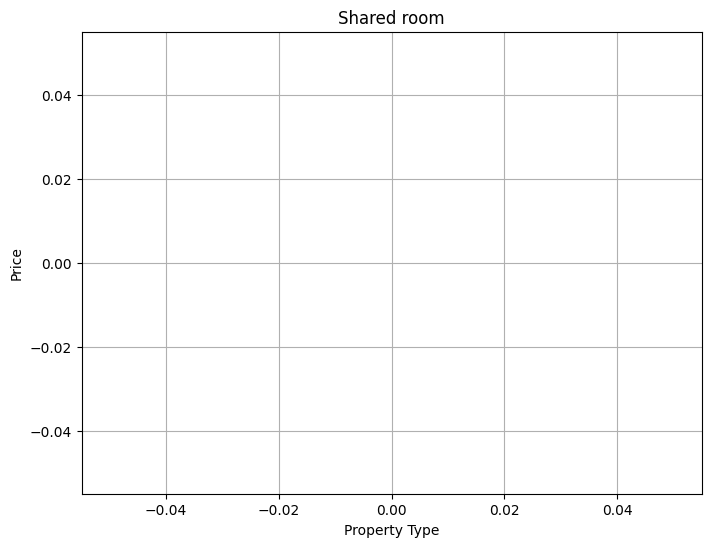

In [737]:
# Shared room
model = LinearRegression()
cd_shared_num = cd_shared[pd.to_numeric(cd_shared['property_type'], errors='coerce').notnull()]
#model.fit(ny_shared[['property_type']], ny_shared['price'])
plt.figure(figsize=(8, 6))
plt.scatter(cd_shared_num[['property_type']], cd_shared_num['price'], color='blue')
#plt.plot(ny_shared[['property_type']], model.predict(ny_shared[['property_type']]), color='red')
plt.title('Shared room')
plt.xlabel('Property Type')
plt.ylabel('Price')
plt.grid(True)
plt.show()

# Paraece que ninguna de las habitaciones compartidas tiene property_type de los 6 más comunes

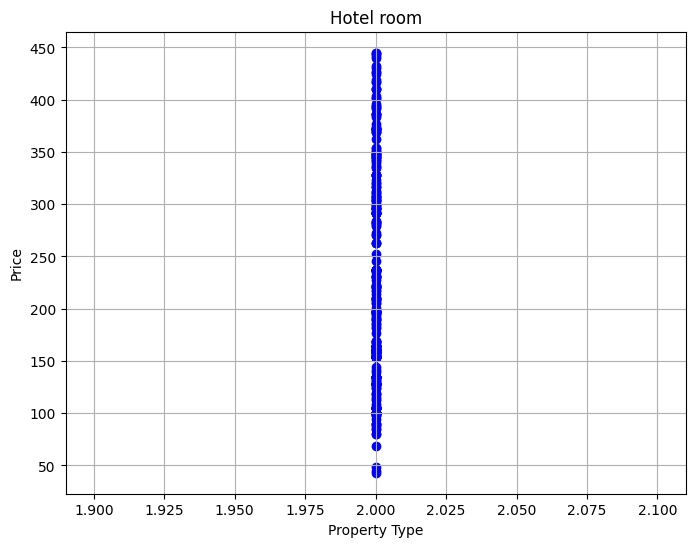

In [738]:
# Hotel room
model = LinearRegression()
cd_hotel_num = cd_hotel[pd.to_numeric(cd_hotel['property_type'], errors='coerce').notnull()]
#model.fit(cd_hotel[['property_type']], cd_hotel['price'])
plt.figure(figsize=(8, 6))
plt.scatter(cd_hotel_num[['property_type']], cd_hotel_num['price'], color='blue')
#plt.plot(cd_hotel[['property_type']], model.predict(cd_hotel[['property_type']]), color='red')
plt.title('Hotel room')
plt.xlabel('Property Type')
plt.ylabel('Price')
plt.grid(True)
plt.show()
# Parece que ninguna de las habitaciones tiene un tipo de propiedad de las 6 más comunes

In [739]:
# Obtenemos los parámetros
# m = model.coef_
# b = model.intercept_
# print('Pendiente:', m)
# print('Intercepto:', b)

# # Entonces, el modelo lineal sería:
# print(f'y = {m[0]}x + {b}', end='\n\n')

# print('Puntaje del modelo:', model.score(ny_hotel[['property_type']], ny_hotel['price']))

### Tablas

En Nueva York, el modelo que obtuvo el mayor puntaje fue el de Shrared room con respecto a la variable instant_bookable y price, con 0.09253627142121013.

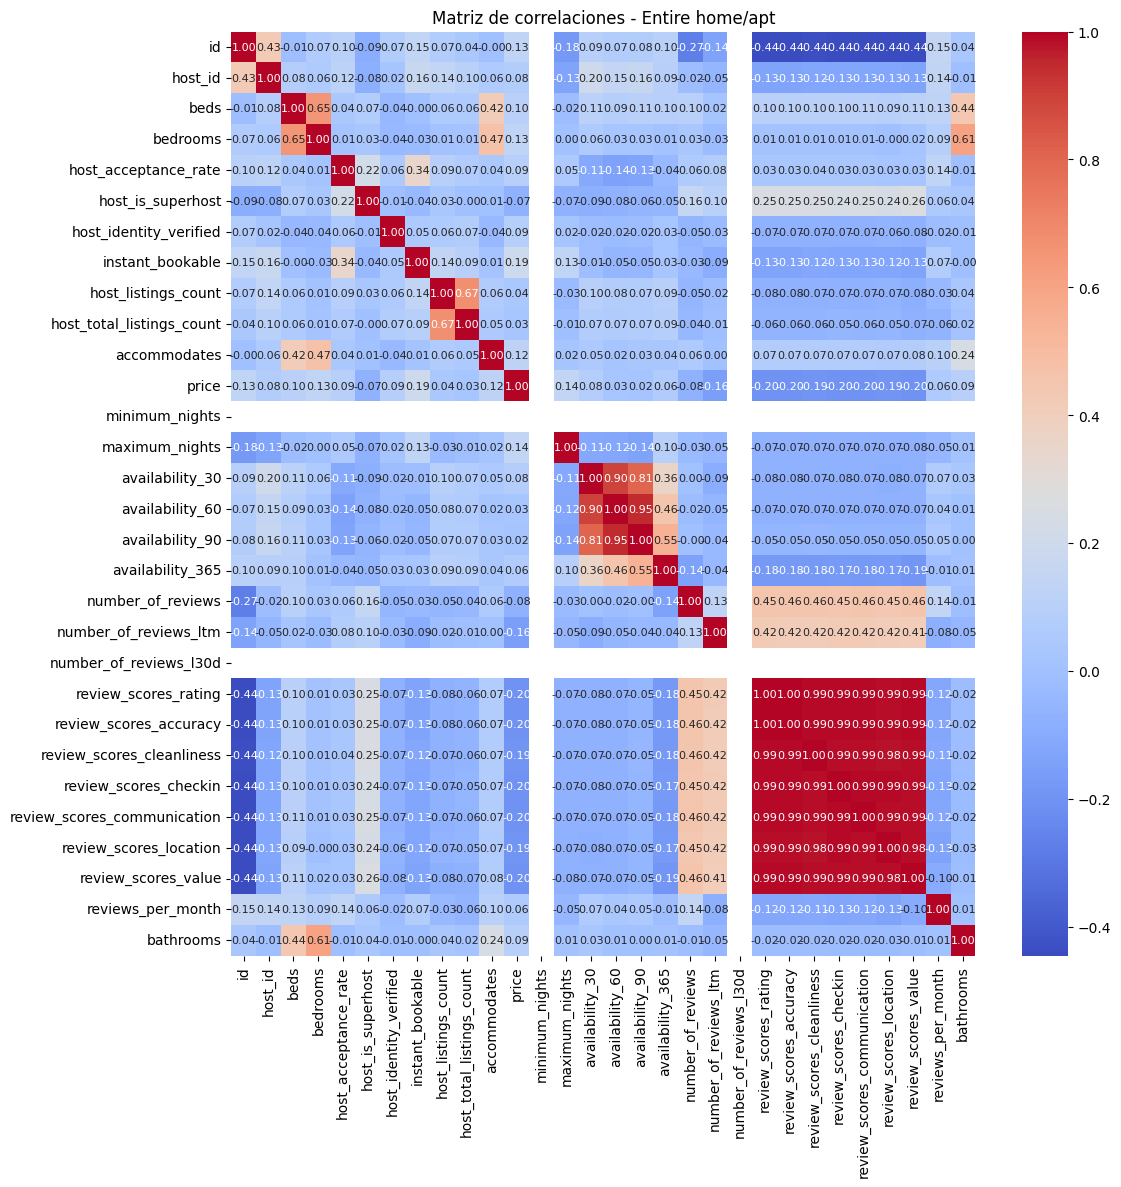

In [745]:
# Hacemos una matriz de correlaciones para cada tipo de habitación, usando todas las variables numéricas
# Primero, seleccionamos solo las variables numéricas

# Entire home/apt
matriz = cd_entire.select_dtypes(include=[np.number])
correlaciones = matriz.corr()

plt.figure(figsize=(12, 12))
sns.heatmap(correlaciones, annot=True, cmap='coolwarm', annot_kws={"size": 8}, fmt='.2f')
plt.title('Matriz de correlaciones - Entire home/apt')
plt.show()

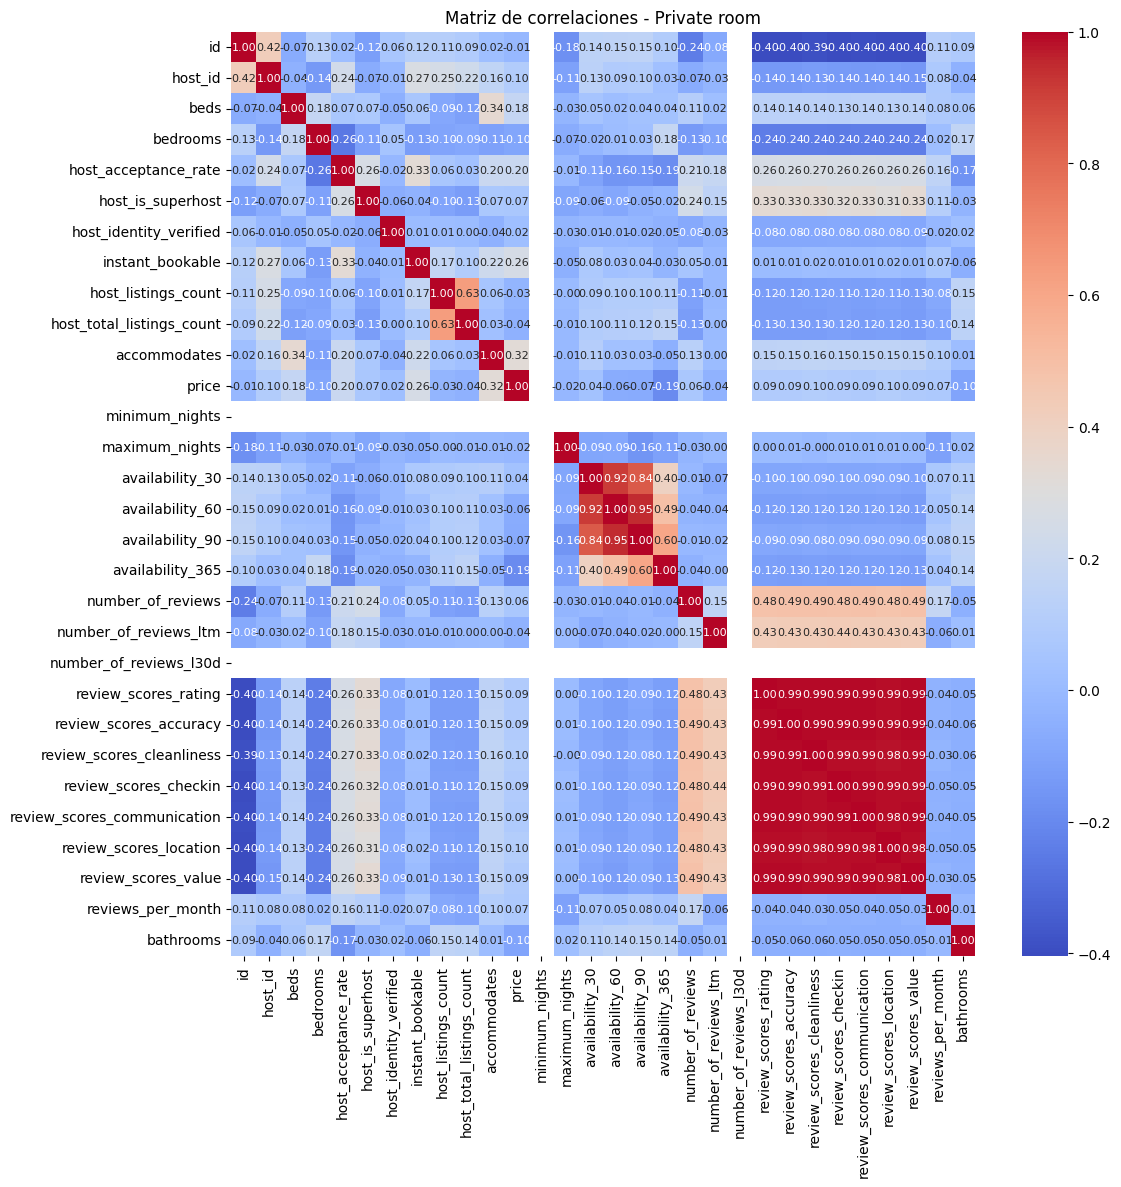

In [741]:
# Ahora con Private room
matriz = cd_private.select_dtypes(include=[np.number])
correlaciones = matriz.corr()

plt.figure(figsize=(12, 12))
sns.heatmap(correlaciones, annot=True, cmap='coolwarm', annot_kws={"size": 8}, fmt='.2f')
plt.title('Matriz de correlaciones - Private room')
plt.show()

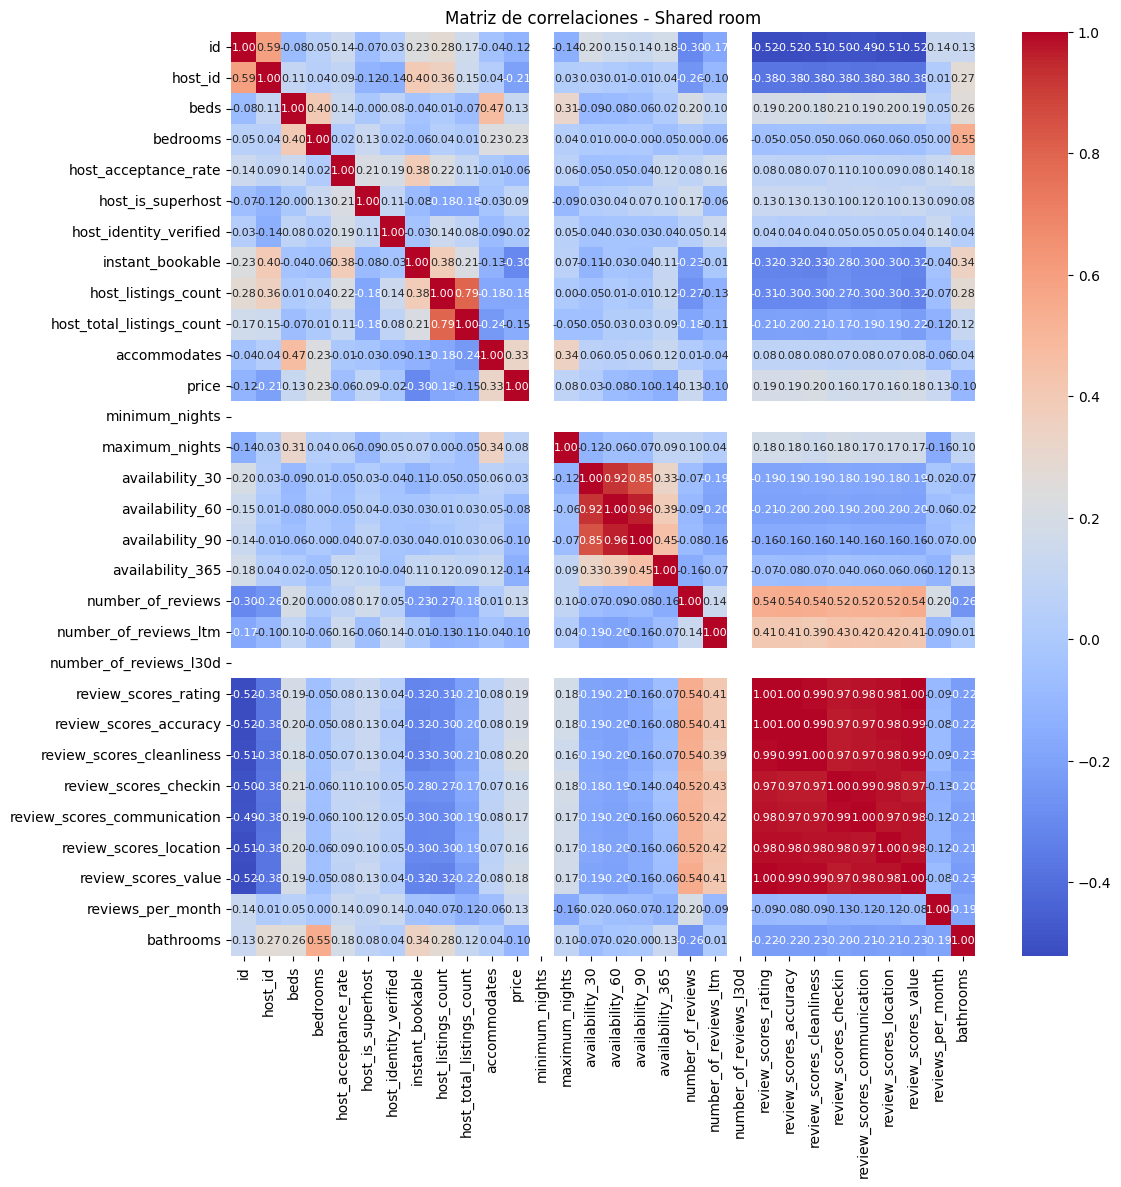

In [742]:
# Ahora con Shared room
matriz = cd_shared.select_dtypes(include=[np.number])
correlaciones = matriz.corr()

plt.figure(figsize=(12, 12))
sns.heatmap(correlaciones, annot=True, cmap='coolwarm', annot_kws={"size": 8}, fmt='.2f')
plt.title('Matriz de correlaciones - Shared room')
plt.show()

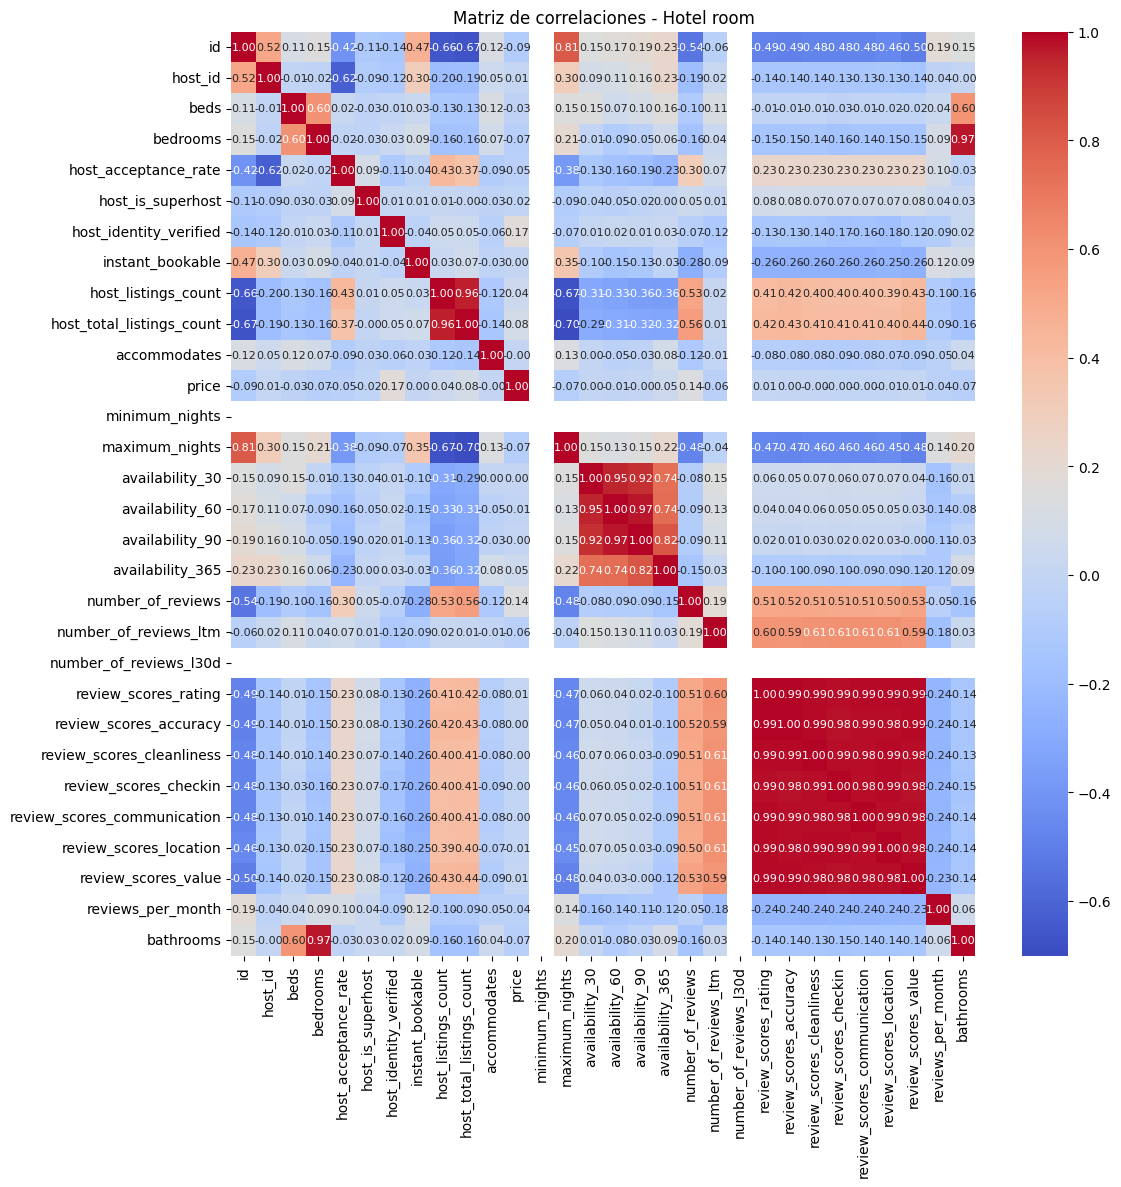

In [743]:
# Ahora con Hotel room
matriz = cd_hotel.select_dtypes(include=[np.number])
correlaciones = matriz.corr()

plt.figure(figsize=(12, 12))
sns.heatmap(correlaciones, annot=True, cmap='coolwarm', annot_kws={"size": 8}, fmt='.2f')
plt.title('Matriz de correlaciones - Hotel room')
plt.show()

## CDMX

In [808]:
cd = pd.read_csv('listings - CDMX_clean.csv')
# Quitamos el Unamed: 0
cd = cd.drop(['Unnamed: 0'], axis=1)
cd.head()

id  host_id  beds  bedrooms           source  \
0   44616   196253   1.0       5.0  previous scrape   
1   67703   334451   2.0       2.0      city scrape   
2   70644   212109   1.0       1.0      city scrape   
3  107078   540705   1.0       1.0      city scrape   
4  131610   647454   1.0       2.0  previous scrape   

                                               name  \
0                                      Condesa Haus   
1                 2 bedroom apt. deco bldg, Condesa   
2  Beautiful light Studio Coyoacan- full equipped !   
3                                NEW  DESIGNER LOFT   
4                                    MARIA DEL ALMA   

                                         description  \
0  A new concept of hosting in mexico through a b...   
1  Comfortably furnished, sunny, 2 bedroom apt., ...   
2  COYOACAN designer studio quiet & safe! well eq...   
3  Is the best ever place triple L <br />Location...   
4                                     No description   

                               neighborhood_overview host_name  host_since  \
0                           No neighborhood_overview  Fernando  2010-08-09   
1                           No neighborhood_overview  Nicholas  2011-01-04   
2  Coyoacan is a beautiful neighborhood famous fo...    Trisha  2010-08-24   
3  Is located in the best area of Mexico City, Po...    Andrea  2011-04-27   
4                           No neighborhood_overview  Fernando  2011-05-31   

   ... number_of_reviews_ltm number_of_reviews_l30d review_scores_rating  \
0  ...                   0.0                    0.0                 4.58   
1  ...                   4.0                    0.0                 4.90   
2  ...                   7.0                    2.0                 4.91   
3  ...                   0.0                    0.0                 4.91   
4  ...                   0.0                    0.0                 4.80   

  review_scores_accuracy review_scores_cleanliness review_scores_checkin  \
0                   4.56                      4.70                  4.87   
1                   4.81                      4.75                  4.94   
2                   4.90                      4.96                  4.96   
3                   5.00                      5.00                  5.00   
4                   4.80                      4.80                  4.90   

  review_scores_communication review_scores_location review_scores_value  \
0                        4.78                   4.98                4.48   
1                        4.92                   4.98                4.91   
2                        4.98                   4.96                4.92   
3                        4.73                   4.91                4.82   
4                        4.90                   4.90                4.80   

  reviews_per_month  
0              0.41  
1              0.31  
2              0.83  
3              0.11  
4              1.17  

[5 rows x 48 columns]

In [809]:
# Transformamos algunas variables para su tratamiento

# Transformamos host_response_rate a float
# Los No data los quitamos
cd = cd[cd['host_acceptance_rate'] != 'No data']
cd['host_acceptance_rate'] = cd['host_acceptance_rate'].str.replace('%', '').astype(float)

# Pasamos host_is_superhost a entero, donde t es 1 y f es 0
cd['host_is_superhost'] = cd['host_is_superhost'].replace({'t': 1, 'f': 0})
cd['host_is_superhost'] = cd['host_is_superhost'].astype(int)

# Dado que no tenemos la variable bathrooms, la creamos usando bathrooms_text
# Quitaremos el texto y nos quedaremos solo con el número de la izquierda
cd['bathrooms'] = cd['bathrooms_text'].str.extract('(\d+\.?\d*)').astype(float)
# Quitamos los valores nulos
cd = cd[cd['bathrooms'].notnull()]

# Transformamos las variable instant_bookable a entero, donde t es 1 y f es 0
cd['instant_bookable'] = cd['instant_bookable'].replace({'t': 1, 'f': 0})

# Transformamos la variable host_identity_verified a entero, donde t es 1 y f es 0
cd['host_identity_verified'] = cd['host_identity_verified'].replace({'t': 1, 'f': 0})

# Pasamos a numérico la variable property_type
# Donde:
types = {
    'Entire rental unit': 1,
    'Entire condo': 2,
    'Private room in rental unit': 3,
    'Private room in home': 4,
    'Entire loft': 5,
    'Entire serviced apartment': 6,
    'Private room in condo': 7,
    'Entire home': 8,
    }
cd['property_type'] = cd['property_type'].replace(types)


C:\Users\angel\AppData\Local\Temp\ipykernel_14752\2712793059.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cd['host_is_superhost'] = cd['host_is_superhost'].replace({'t': 1, 'f': 0})
C:\Users\angel\AppData\Local\Temp\ipykernel_14752\2712793059.py:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cd['instant_bookable'] = cd['instant_bookable'].replace({'t': 1, 'f': 0})
C:\Users\angel\AppData\Local\Temp\ipykernel_14752\2712793059.py:22: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a fut

In [810]:
# Vamos a separar en distintos dataframes los diferentes tipos de habitaciones
cd_entire = cd[cd['room_type'] == 'Entire home/apt']
cd_private = cd[cd['room_type'] == 'Private room']
cd_shared = cd[cd['room_type'] == 'Shared room']
cd_hotel = cd[cd['room_type'] == 'Hotel room']

print(cd_entire['room_type'].value_counts(), end='\n\n')
print(cd_private['room_type'].value_counts(), end='\n\n')
print(cd_shared['room_type'].value_counts(), end='\n\n')
print(cd_hotel['room_type'].value_counts(), end='\n\n')

room_type
Entire home/apt    15919
Name: count, dtype: int64

room_type
Private room    7302
Name: count, dtype: int64

room_type
Shared room    340
Name: count, dtype: int64

room_type
Hotel room    87
Name: count, dtype: int64



### x = host_acceptance_rate, y = price

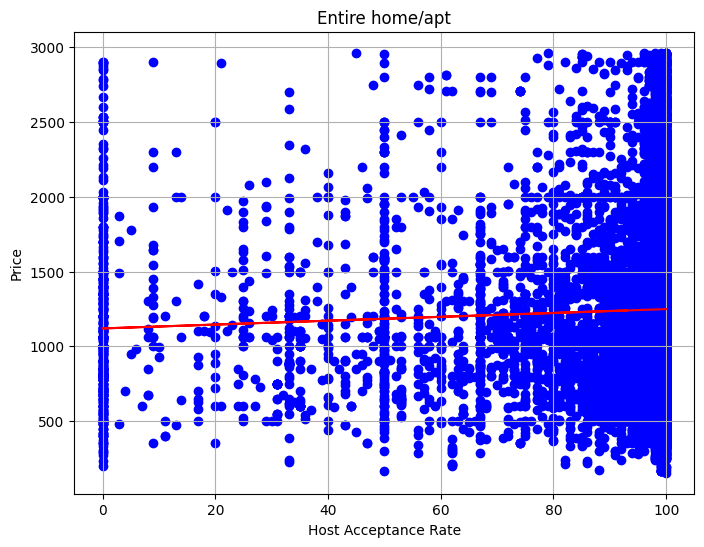

In [811]:
# Ahora, vamos a realizar una regresión lineal usando cada df de habitaciones con respecto al precio y host_acceptance_rate.
# Ponemos el precio como variable dependiente y el host_acceptance_rate como variable independiente.

model = LinearRegression()
model.fit(cd_entire[['host_acceptance_rate']], cd_entire['price'])

# Hacemos la gráfica de la regresión lineal
plt.figure(figsize=(8, 6))
plt.scatter(cd_entire[['host_acceptance_rate']], cd_entire['price'], color='blue')
plt.plot(cd_entire[['host_acceptance_rate']], model.predict(cd_entire[['host_acceptance_rate']]), color='red')
plt.title('Entire home/apt')
plt.xlabel('Host Acceptance Rate')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [812]:
# Sacamos los parámetros de la regresión lineal con su puntaje
# Obtenemos los parámetros
m = model.coef_
b = model.intercept_
print('Pendiente:', m)
print('Intercepto:', b)

# Entonces, el modelo lineal sería:
print(f'y = {m[0]}x + {b}', end='\n\n')

print('Puntaje del modelo:', model.score(cd_entire[['host_acceptance_rate']], cd_entire['price']))

Pendiente: [1.29409444]
Intercepto: 1119.6677551898943
y = 1.2940944439793787x + 1119.6677551898943

Puntaje del modelo: 0.0021526649804193276


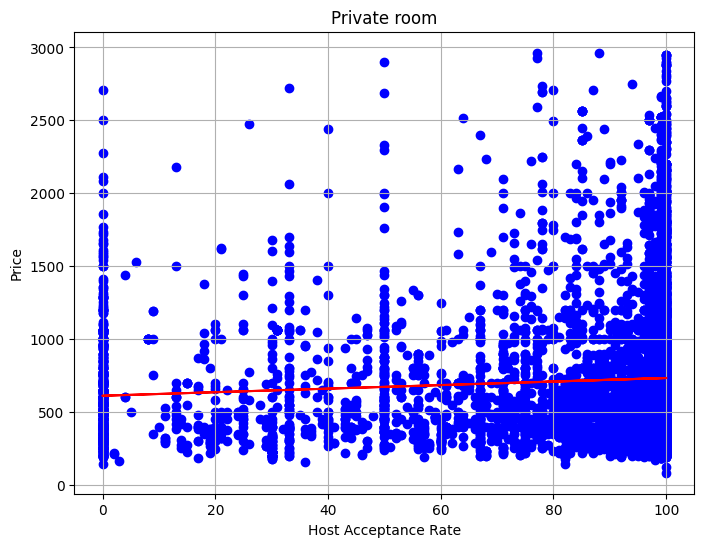

In [813]:
# Haremos lo mismo para los otros tipos de habitaciones
model = LinearRegression()
model.fit(cd_private[['host_acceptance_rate']], cd_private['price'])
plt.figure(figsize=(8, 6))
plt.scatter(cd_private[['host_acceptance_rate']], cd_private['price'], color='blue')
plt.plot(cd_private[['host_acceptance_rate']], model.predict(cd_private[['host_acceptance_rate']]), color='red')
plt.title('Private room')
plt.xlabel('Host Acceptance Rate')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [814]:
# Obtenemos los parámetros
m = model.coef_
b = model.intercept_
print('Pendiente:', m)
print('Intercepto:', b)

# Entonce, el modelo lineal sería:
print(f'y = {m[0]}x + {b}', end='\n\n')

print('Puntaje del modelo:', model.score(cd_private[['host_acceptance_rate']], cd_private['price']))

Pendiente: [1.21757765]
Intercepto: 611.0333893206403
y = 1.217577649909787x + 611.0333893206403

Puntaje del modelo: 0.005896798729804309


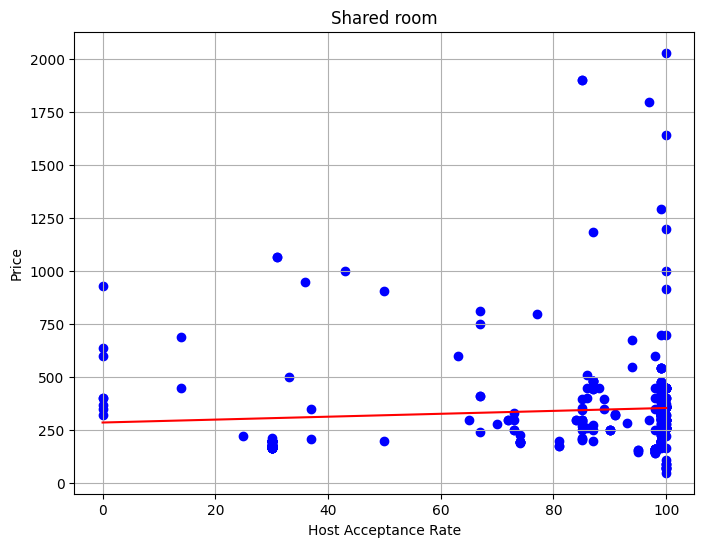

In [815]:
# Shared room
model = LinearRegression()
model.fit(cd_shared[['host_acceptance_rate']], cd_shared['price'])
plt.figure(figsize=(8, 6))
plt.scatter(cd_shared[['host_acceptance_rate']], cd_shared['price'], color='blue')
plt.plot(cd_shared[['host_acceptance_rate']], model.predict(cd_shared[['host_acceptance_rate']]), color='red')
plt.title('Shared room')
plt.xlabel('Host Acceptance Rate')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [816]:
# Obtenemos los parámetros
m = model.coef_
b = model.intercept_
print('Pendiente:', m)
print('Intercepto:', b)

# Entonce, el modelo lineal sería:
print(f'y = {m[0]}x + {b}', end='\n\n')

print('Puntaje del modelo:', model.score(cd_shared[['host_acceptance_rate']], cd_shared['price']))

Pendiente: [0.68549839]
Intercepto: 286.5647066317494
y = 0.6854983911903957x + 286.5647066317494

Puntaje del modelo: 0.00589825226496532


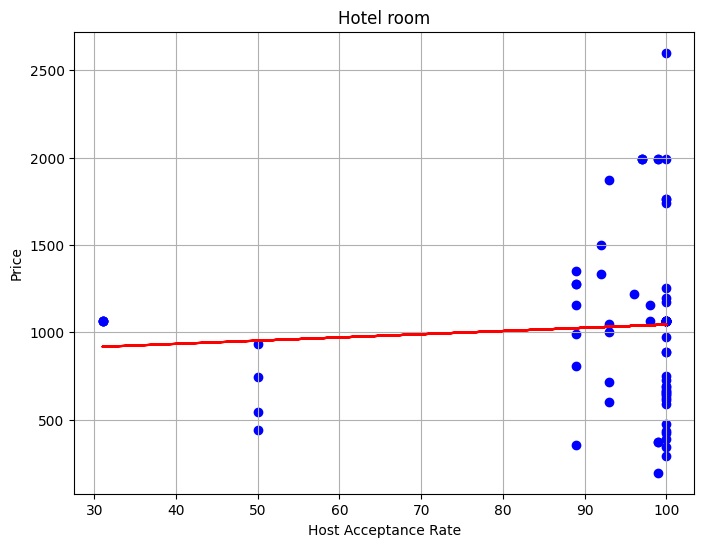

In [817]:
# Hotel room
model = LinearRegression()
model.fit(cd_hotel[['host_acceptance_rate']], cd_hotel['price'])
plt.figure(figsize=(8, 6))
plt.scatter(cd_hotel[['host_acceptance_rate']], cd_hotel['price'], color='blue')
plt.plot(cd_hotel[['host_acceptance_rate']], model.predict(cd_hotel[['host_acceptance_rate']]), color='red')
plt.title('Hotel room')
plt.xlabel('Host Acceptance Rate')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [818]:
# Obtenemos los parámetros
m = model.coef_
b = model.intercept_
print('Pendiente:', m)
print('Intercepto:', b)

# Entonce, el modelo lineal sería:
print(f'y = {m[0]}x + {b}', end='\n\n')

print('Puntaje del modelo:', model.score(cd_hotel[['host_acceptance_rate']], cd_hotel['price']))

Pendiente: [1.839277]
Intercepto: 860.6321166620064
y = 1.839277002362163x + 860.6321166620064

Puntaje del modelo: 0.004804918363333743


### x = host_is_superhost, y = price

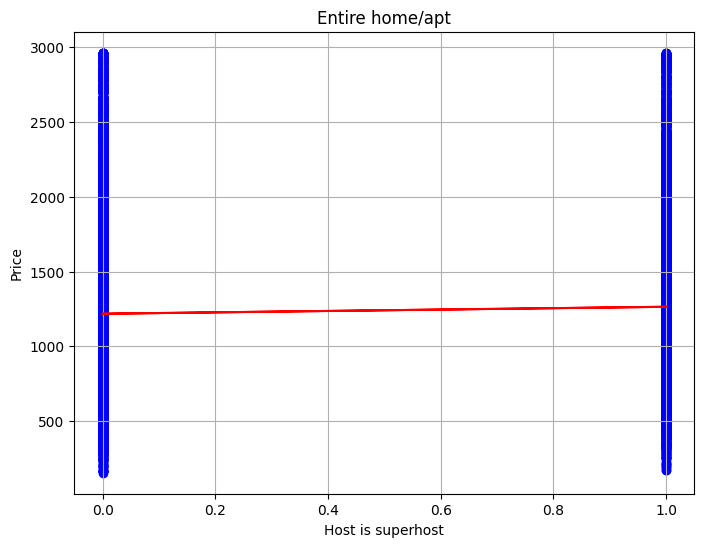

In [819]:
# Ahora, vamos a realizar una regresión lineal usando cada df de habitaciones con respecto al precio y host_is_superhost.

# Entire home/apt
model = LinearRegression()
model.fit(cd_entire[['host_is_superhost']], cd_entire['price'])
plt.figure(figsize=(8, 6))
plt.scatter(cd_entire[['host_is_superhost']], cd_entire['price'], color='blue')
plt.plot(cd_entire[['host_is_superhost']], model.predict(cd_entire[['host_is_superhost']]), color='red')
plt.title('Entire home/apt')
plt.xlabel('Host is superhost')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [820]:
# Obtenemos los parámetros
m = model.coef_
b = model.intercept_
print('Pendiente:', m)
print('Intercepto:', b)

# Entonce, el modelo lineal sería:
print(f'y = {m[0]}x + {b}', end='\n\n')

print('Puntaje del modelo:', model.score(cd_entire[['host_is_superhost']], cd_entire['price']))

Pendiente: [46.67106425]
Intercepto: 1217.892621426912
y = 46.67106424700144x + 1217.892621426912

Puntaje del modelo: 0.0017867811179029802


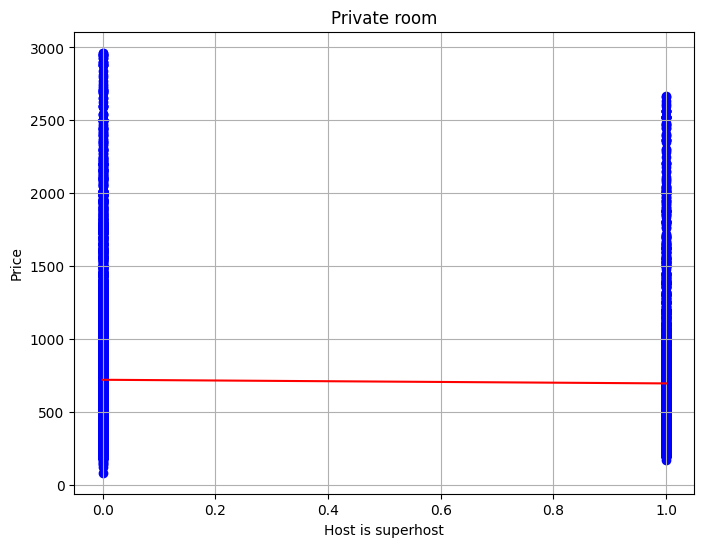

In [821]:
# Private room
model = LinearRegression()
model.fit(cd_private[['host_is_superhost']], cd_private['price'])
plt.figure(figsize=(8, 6))
plt.scatter(cd_private[['host_is_superhost']], cd_private['price'], color='blue')
plt.plot(cd_private[['host_is_superhost']], model.predict(cd_private[['host_is_superhost']]), color='red')
plt.title('Private room')
plt.xlabel('Host is superhost')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [822]:
# Obtenemos los parámetros
m = model.coef_
b = model.intercept_
print('Pendiente:', m)
print('Intercepto:', b)

# Entonce, el modelo lineal sería:
print(f'y = {m[0]}x + {b}', end='\n\n')

print('Puntaje del modelo:', model.score(cd_private[['host_is_superhost']], cd_private['price']))

Pendiente: [-24.93672149]
Intercepto: 720.5948540243741
y = -24.936721494253803x + 720.5948540243741

Puntaje del modelo: 0.0006379305931213386


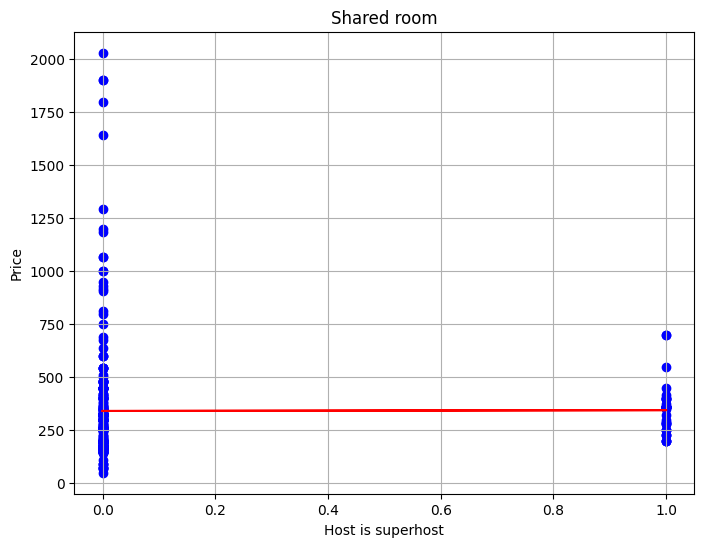

In [823]:
# Shared room
model = LinearRegression()
model.fit(cd_shared[['host_is_superhost']], cd_shared['price'])
plt.figure(figsize=(8, 6))
plt.scatter(cd_shared[['host_is_superhost']], cd_shared['price'], color='blue')
plt.plot(cd_shared[['host_is_superhost']], model.predict(cd_shared[['host_is_superhost']]), color='red')
plt.title('Shared room')
plt.xlabel('Host is superhost')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [824]:
# Obtenemos los parámetros
m = model.coef_
b = model.intercept_
print('Pendiente:', m)

# Entonce, el modelo lineal sería:
print(f'y = {m[0]}x + {b}', end='\n\n')

print('Puntaje del modelo:', model.score(cd_shared[['host_is_superhost']], cd_shared['price']))

Pendiente: [3.95416667]
y = 3.954166666666689x + 340.93333333333334

Puntaje del modelo: 2.382311619031352e-05


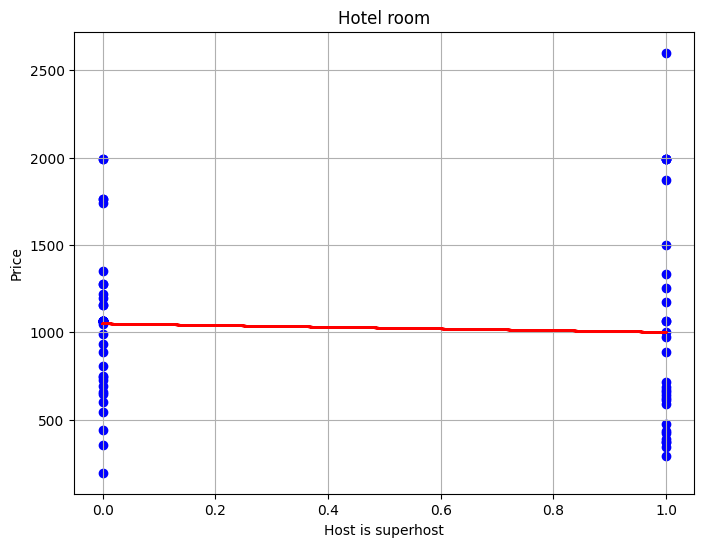

In [825]:
# Hotel room
model = LinearRegression()
model.fit(cd_hotel[['host_is_superhost']], cd_hotel['price'])
plt.figure(figsize=(8, 6))
plt.scatter(cd_hotel[['host_is_superhost']], cd_hotel['price'], color='blue')
plt.plot(cd_hotel[['host_is_superhost']], model.predict(cd_hotel[['host_is_superhost']]), color='red')
plt.title('Hotel room')
plt.xlabel('Host is superhost')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [826]:
# Obtenemos los parámetros
m = model.coef_
b = model.intercept_
print('Pendiente:', m)
print('Intercepto:', b)

# Entonce, el modelo lineal sería:
print(f'y = {m[0]}x + {b}', end='\n\n')

print('Puntaje del modelo:', model.score(cd_hotel[['host_is_superhost']], cd_hotel['price']))

Pendiente: [-48.67889785]
Intercepto: 1048.6708333333333
y = -48.6788978494624x + 1048.6708333333333

Puntaje del modelo: 0.0026014778681434647


### x = bathrooms, y = accomodates

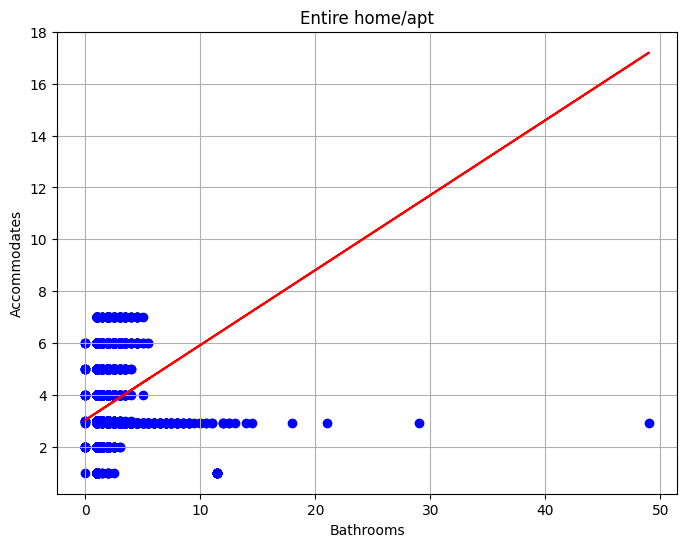

In [827]:
# Ahora, vamos a realizar una regresión lineal usando cada df de habitaciones con respecto al accoomodates y bathrooms.
# Ponemos los baños como variable independiente y el número de acomodados como variable dependiente.

# Entire home/apt
model = LinearRegression()
model.fit(cd_entire[['bathrooms']], cd_entire['accommodates'])
plt.figure(figsize=(8, 6))
plt.scatter(cd_entire[['bathrooms']], cd_entire['accommodates'], color='blue')
plt.plot(cd_entire[['bathrooms']], model.predict(cd_entire[['bathrooms']]), color='red')
plt.title('Entire home/apt')
plt.xlabel('Bathrooms')
plt.ylabel('Accommodates')
plt.grid(True)
plt.show()

In [828]:
# Obtenemos los parámetros
m = model.coef_
b = model.intercept_
print('Pendiente:', m)
print('Intercepto:', b)

# Entonce, el modelo lineal sería:
print(f'y = {m[0]}x + {b}', end='\n\n')

print('Puntaje del modelo:', model.score(cd_entire[['bathrooms']], cd_entire['accommodates']))

Pendiente: [0.28908891]
Intercepto: 3.0312933667655577
y = 0.28908891215953647x + 3.0312933667655577

Puntaje del modelo: 0.047934176884110724


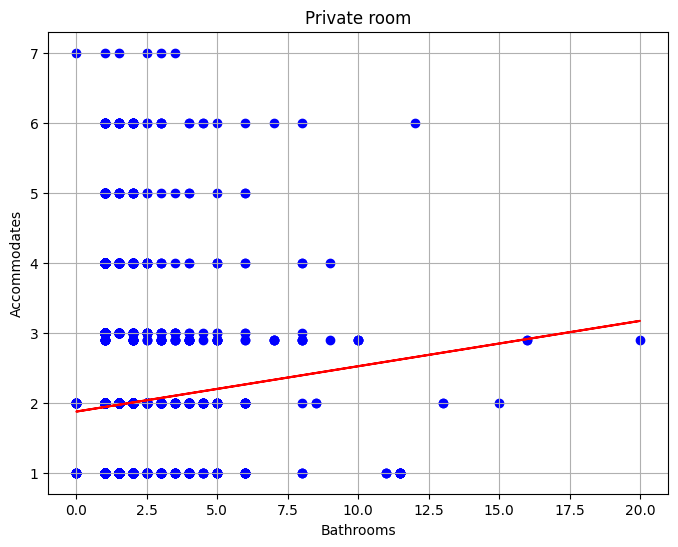

In [829]:
# Private room
model = LinearRegression()
model.fit(cd_private[['bathrooms']], cd_private['accommodates'])
plt.figure(figsize=(8, 6))
plt.scatter(cd_private[['bathrooms']], cd_private['accommodates'], color='blue')
plt.plot(cd_private[['bathrooms']], model.predict(cd_private[['bathrooms']]), color='red')
plt.title('Private room')
plt.xlabel('Bathrooms')
plt.ylabel('Accommodates')
plt.grid(True)
plt.show()

In [830]:
# Obtenemos los parámetros
m = model.coef_
b = model.intercept_
print('Pendiente:', m)
print('Intercepto:', b)

# Entonce, el modelo lineal sería:
print(f'y = {m[0]}x + {b}', end='\n\n')

print('Puntaje del modelo:', model.score(cd_private[['bathrooms']], cd_private['accommodates']))

Pendiente: [0.0647674]
Intercepto: 1.8736777422692845
y = 0.06476740046362962x + 1.8736777422692845

Puntaje del modelo: 0.0055024574233709656


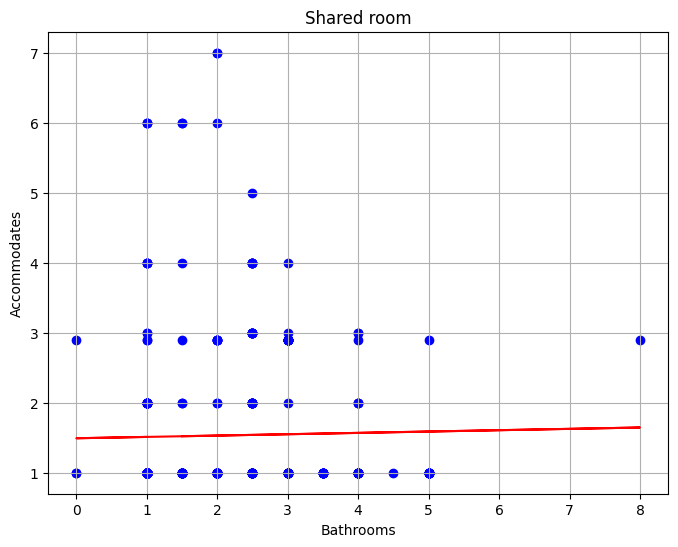

In [831]:
# Shared room
model = LinearRegression()
model.fit(cd_shared[['bathrooms']], cd_shared['accommodates'])
plt.figure(figsize=(8, 6))
plt.scatter(cd_shared[['bathrooms']], cd_shared['accommodates'], color='blue')
plt.plot(cd_shared[['bathrooms']], model.predict(cd_shared[['bathrooms']]), color='red')
plt.title('Shared room')
plt.xlabel('Bathrooms')
plt.ylabel('Accommodates')
plt.grid(True)
plt.show()

In [832]:
# Obtenemos los parámetros
m = model.coef_
b = model.intercept_
print('Pendiente:', m)
print('Intercepto:', b)

# Entonce, el modelo lineal sería:
print(f'y = {m[0]}x + {b}', end='\n\n')

print('Puntaje del modelo:', model.score(cd_shared[['bathrooms']], cd_shared['accommodates']))

Pendiente: [0.01918294]
Intercepto: 1.4923430366615291
y = 0.019182938046258372x + 1.4923430366615291

Puntaje del modelo: 0.0004760446505841509


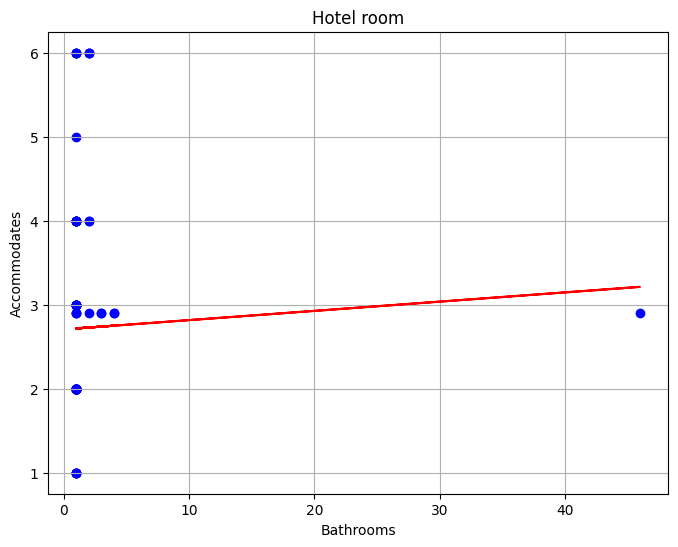

In [833]:
# Hotel room
model = LinearRegression()
model.fit(cd_hotel[['bathrooms']], cd_hotel['accommodates'])
plt.figure(figsize=(8, 6))
plt.scatter(cd_hotel[['bathrooms']], cd_hotel['accommodates'], color='blue')
plt.plot(cd_hotel[['bathrooms']], model.predict(cd_hotel[['bathrooms']]), color='red')
plt.title('Hotel room')
plt.xlabel('Bathrooms')
plt.ylabel('Accommodates')
plt.grid(True)
plt.show()

In [834]:
# Obtenemos los parámetros
m = model.coef_
b = model.intercept_
print('Pendiente:', m)
print('Intercepto:', b)

# Entonce, el modelo lineal sería:
print(f'y = {m[0]}x + {b}', end='\n\n')

print('Puntaje del modelo:', model.score(cd_hotel[['bathrooms']], cd_hotel['accommodates']))

Pendiente: [0.01100047]
Intercepto: 2.706573916616259
y = 0.011000467935036925x + 2.706573916616259

Puntaje del modelo: 0.0018118840186517327


### x = review_score_cleanliness, y = price

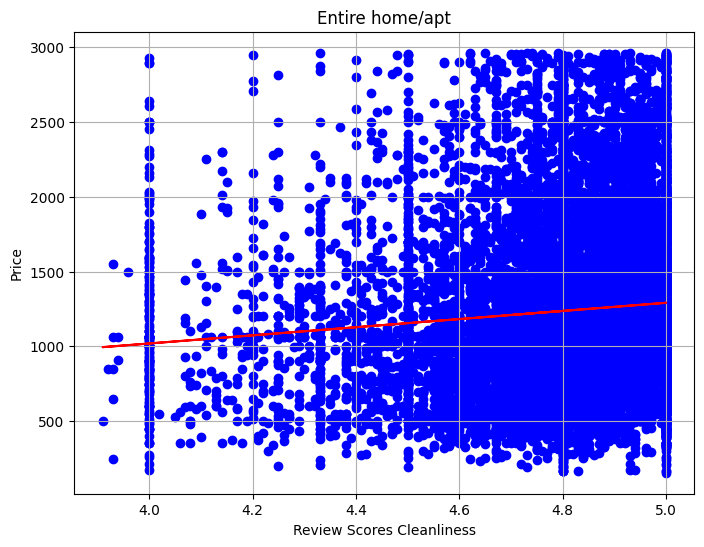

In [835]:
# Seguimos, pero ahora con review_score_cleanliness y price

# Entire home/apt
model = LinearRegression()
model.fit(cd_entire[['review_scores_cleanliness']], cd_entire['price'])
plt.figure(figsize=(8, 6))
plt.scatter(cd_entire[['review_scores_cleanliness']], cd_entire['price'], color='blue')
plt.plot(cd_entire[['review_scores_cleanliness']], model.predict(cd_entire[['review_scores_cleanliness']]), color='red')
plt.title('Entire home/apt')
plt.xlabel('Review Scores Cleanliness')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [836]:
# Obtenemos los parámetros
m = model.coef_
b = model.intercept_
print('Pendiente:', m)

# Entonce, el modelo lineal sería:
print(f'y = {m[0]}x + {b}', end='\n\n')

print('Puntaje del modelo:', model.score(cd_entire[['review_scores_cleanliness']], cd_entire['price']))

Pendiente: [272.3309673]
y = 272.3309672954961x + -70.34568276000141

Puntaje del modelo: 0.008870050658033368


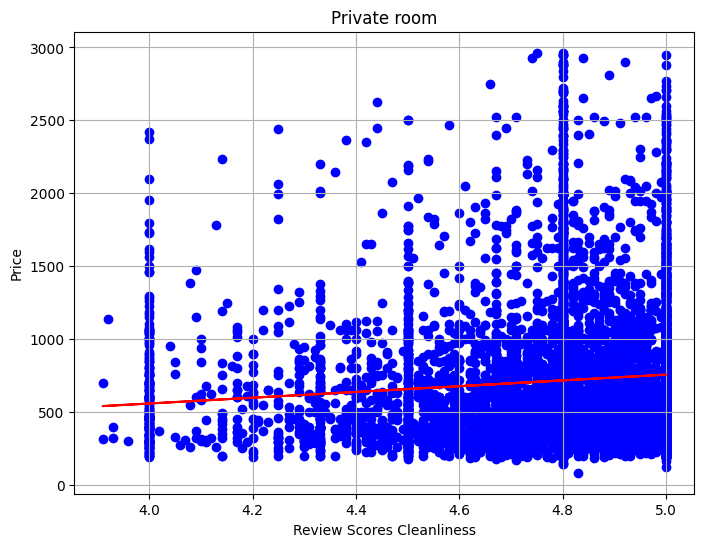

In [837]:
# Private room
model = LinearRegression()
model.fit(cd_private[['review_scores_cleanliness']], cd_private['price'])
plt.figure(figsize=(8, 6))
plt.scatter(cd_private[['review_scores_cleanliness']], cd_private['price'], color='blue')
plt.plot(cd_private[['review_scores_cleanliness']], model.predict(cd_private[['review_scores_cleanliness']]), color='red')
plt.title('Private room')
plt.xlabel('Review Scores Cleanliness')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [838]:
# Obtenemos los parámetros
m = model.coef_
b = model.intercept_
print('Pendiente:', m)

# Entonce, el modelo lineal sería:
print(f'y = {m[0]}x + {b}', end='\n\n')

print('Puntaje del modelo:', model.score(cd_private[['review_scores_cleanliness']], cd_private['price']))

Pendiente: [198.21445371]
y = 198.21445370649081x + -235.1116602017961

Puntaje del modelo: 0.00931068998532969


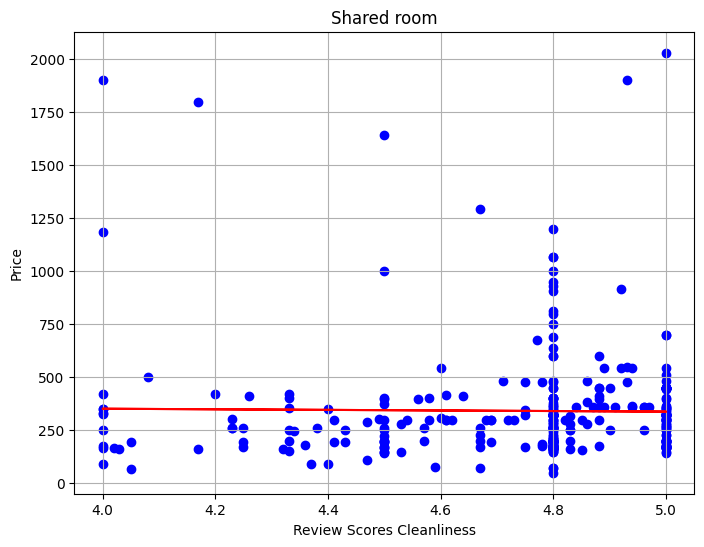

In [839]:
# Shared room
model = LinearRegression()
model.fit(cd_shared[['review_scores_cleanliness']], cd_shared['price'])
plt.figure(figsize=(8, 6))
plt.scatter(cd_shared[['review_scores_cleanliness']], cd_shared['price'], color='blue')
plt.plot(cd_shared[['review_scores_cleanliness']], model.predict(cd_shared[['review_scores_cleanliness']]), color='red')
plt.title('Shared room')
plt.xlabel('Review Scores Cleanliness')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [840]:
# Obtenemos los parámetros
m = model.coef_
b = model.intercept_
print('Pendiente:', m)

# Entonce, el modelo lineal sería:
print(f'y = {m[0]}x + {b}', end='\n\n')

print('Puntaje del modelo:', model.score(cd_shared[['review_scores_cleanliness']], cd_shared['price']))

Pendiente: [-13.69242022]
y = -13.692420217157547x + 406.3581899496519

Puntaje del modelo: 0.00017609679385077737


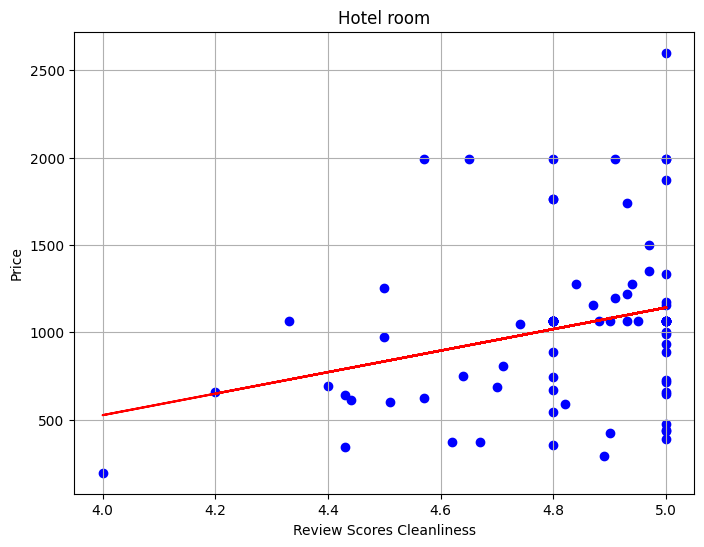

In [841]:
# Hotel room
model = LinearRegression()
model.fit(cd_hotel[['review_scores_cleanliness']], cd_hotel['price'])
plt.figure(figsize=(8, 6))
plt.scatter(cd_hotel[['review_scores_cleanliness']], cd_hotel['price'], color='blue')
plt.plot(cd_hotel[['review_scores_cleanliness']], model.predict(cd_hotel[['review_scores_cleanliness']]), color='red')
plt.title('Hotel room')
plt.xlabel('Review Scores Cleanliness')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [842]:
# Obtenemos los parámetros
m = model.coef_
b = model.intercept_
print('Pendiente:', m)
print('Intercepto:', b)

# Entonce, el modelo lineal sería:
print(f'y = {m[0]}x + {b}', end='\n\n')

print('Puntaje del modelo:', model.score(cd_hotel[['review_scores_cleanliness']], cd_hotel['price']))

Pendiente: [615.9010491]
Intercepto: -1937.388370974348
y = 615.9010491032191x + -1937.388370974348

Puntaje del modelo: 0.07459692800770701


### host_idendity_verified, y = price

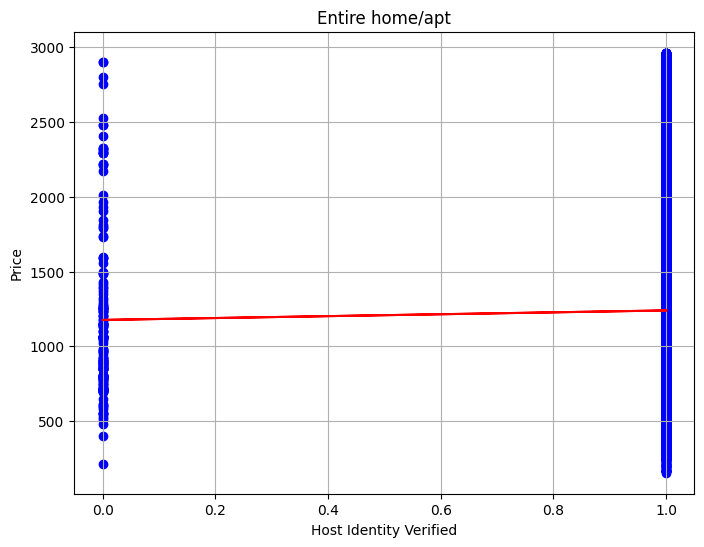

In [843]:
# Seguimos con host_identity_verified como independiente y price como dependiente

# Entire home/apt
model = LinearRegression()
model.fit(cd_entire[['host_identity_verified']], cd_entire['price'])
plt.figure(figsize=(8, 6))
plt.scatter(cd_entire[['host_identity_verified']], cd_entire['price'], color='blue')
plt.plot(cd_entire[['host_identity_verified']], model.predict(cd_entire[['host_identity_verified']]), color='red')
plt.title('Entire home/apt')
plt.xlabel('Host Identity Verified')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [844]:
# Obtenemos los parámetros
m = model.coef_
b = model.intercept_
print('Pendiente:', m)
print('Intercepto:', b)

# Entonce, el modelo lineal sería:
print(f'y = {m[0]}x + {b}', end='\n\n')

print('Puntaje del modelo:', model.score(cd_entire[['host_identity_verified']], cd_entire['price']))

Pendiente: [63.5640543]
Intercepto: 1176.495421245424
y = 63.56405430052921x + 1176.495421245424

Puntaje del modelo: 0.00015083271324511927


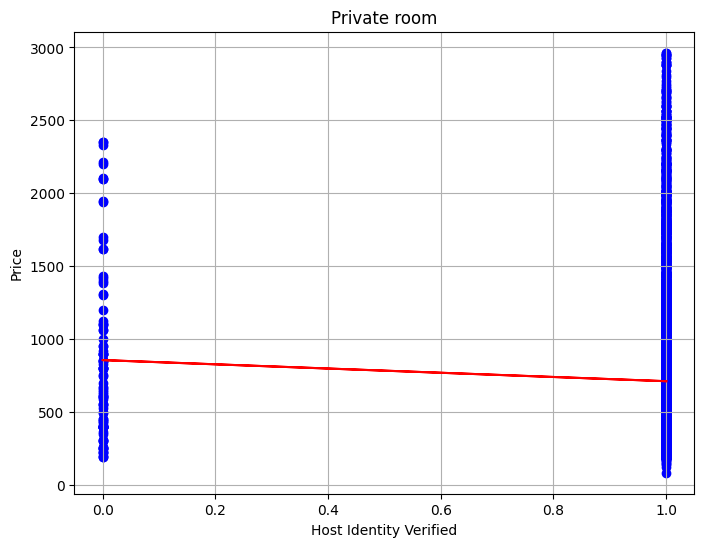

In [845]:
# Private room
model = LinearRegression()
model.fit(cd_private[['host_identity_verified']], cd_private['price'])
plt.figure(figsize=(8, 6))
plt.scatter(cd_private[['host_identity_verified']], cd_private['price'], color='blue')
plt.plot(cd_private[['host_identity_verified']], model.predict(cd_private[['host_identity_verified']]), color='red')
plt.title('Private room')
plt.xlabel('Host Identity Verified')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [846]:
# Obtenemos los parámetros
m = model.coef_
b = model.intercept_
print('Pendiente:', m)
print('Intercepto:', b)

# Entonce, el modelo lineal sería:
print(f'y = {m[0]}x + {b}', end='\n\n')

print('Puntaje del modelo:', model.score(cd_private[['host_identity_verified']], cd_private['price']))

Pendiente: [-144.87840341]
Intercepto: 855.6319444444478
y = -144.87840341382503x + 855.6319444444478

Puntaje del modelo: 0.001287586746548941


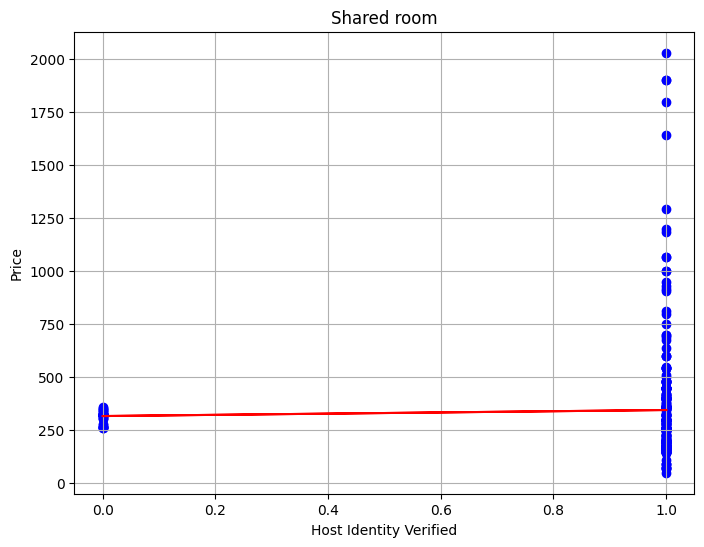

In [847]:
# Shared room
model = LinearRegression()
model.fit(cd_shared[['host_identity_verified']], cd_shared['price'])
plt.figure(figsize=(8, 6))
plt.scatter(cd_shared[['host_identity_verified']], cd_shared['price'], color='blue')
plt.plot(cd_shared[['host_identity_verified']], model.predict(cd_shared[['host_identity_verified']]), color='red')
plt.title('Shared room')
plt.xlabel('Host Identity Verified')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [848]:
# Obtenemos los parámetros
m = model.coef_
b = model.intercept_
print('Pendiente:', m)
print('Intercepto:', b)

# Entonce, el modelo lineal sería:
print(f'y = {m[0]}x + {b}', end='\n\n')

print('Puntaje del modelo:', model.score(cd_shared[['host_identity_verified']], cd_shared['price']))

Pendiente: [28.53071744]
Intercepto: 316.9795918367347
y = 28.530717441615813x + 316.9795918367347

Puntaje del modelo: 0.0014737432731946054


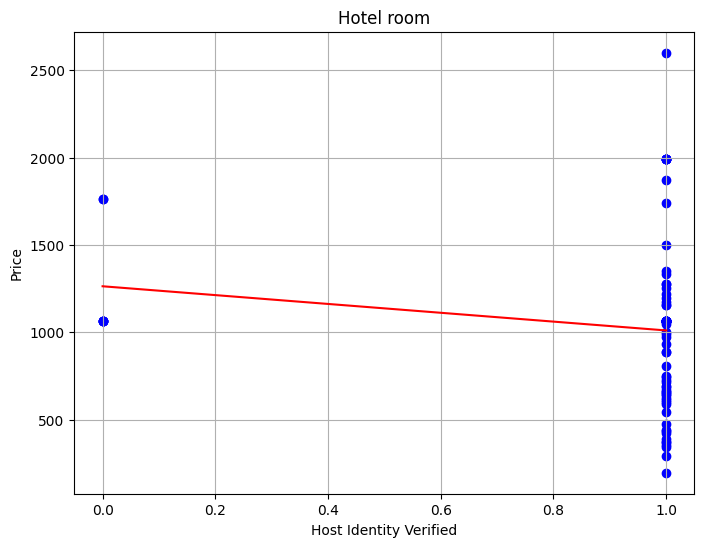

In [849]:
# Hotel room
model = LinearRegression()
model.fit(cd_hotel[['host_identity_verified']], cd_hotel['price'])
plt.figure(figsize=(8, 6))
plt.scatter(cd_hotel[['host_identity_verified']], cd_hotel['price'], color='blue')
plt.plot(cd_hotel[['host_identity_verified']], model.predict(cd_hotel[['host_identity_verified']]), color='red')
plt.title('Hotel room')
plt.xlabel('Host Identity Verified')
plt.ylabel('Price')
plt.grid(True)
plt.show()


In [850]:
# Obtenemos los parámetros
m = model.coef_
b = model.intercept_
print('Pendiente:', m)
print('Intercepto:', b)

# Entonce, el modelo lineal sería:
print(f'y = {m[0]}x + {b}', end='\n\n')

print('Puntaje del modelo:', model.score(cd_hotel[['host_identity_verified']], cd_hotel['price']))

Pendiente: [-252.80050595]
Intercepto: 1263.7857142857142
y = -252.80050595238106x + 1263.7857142857142

Puntaje del modelo: 0.022632516511862488


### x = instant_bookable, y = price

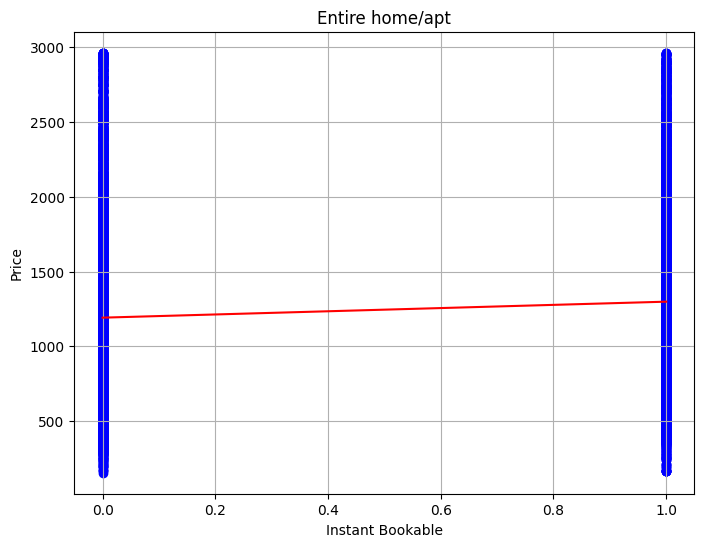

In [851]:
# Seguimos, pero ahora con instant_bookable y price

# Entire home/apt
model = LinearRegression()
model.fit(cd_entire[['instant_bookable']], cd_entire['price'])
plt.figure(figsize=(8, 6))
plt.scatter(cd_entire[['instant_bookable']], cd_entire['price'], color='blue')
plt.plot(cd_entire[['instant_bookable']], model.predict(cd_entire[['instant_bookable']]), color='red')
plt.title('Entire home/apt')
plt.xlabel('Instant Bookable')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [852]:
# Obtenemos los parámetros
m = model.coef_
b = model.intercept_
print('Pendiente:', m)
print('Intercepto:', b)

# Entonce, el modelo lineal sería:
print(f'y = {m[0]}x + {b}', end='\n\n')

print('Puntaje del modelo:', model.score(cd_entire[['instant_bookable']], cd_entire['price']))

Pendiente: [106.94990778]
Intercepto: 1191.7666176415103
y = 106.94990778222198x + 1191.7666176415103

Puntaje del modelo: 0.009329884149478773


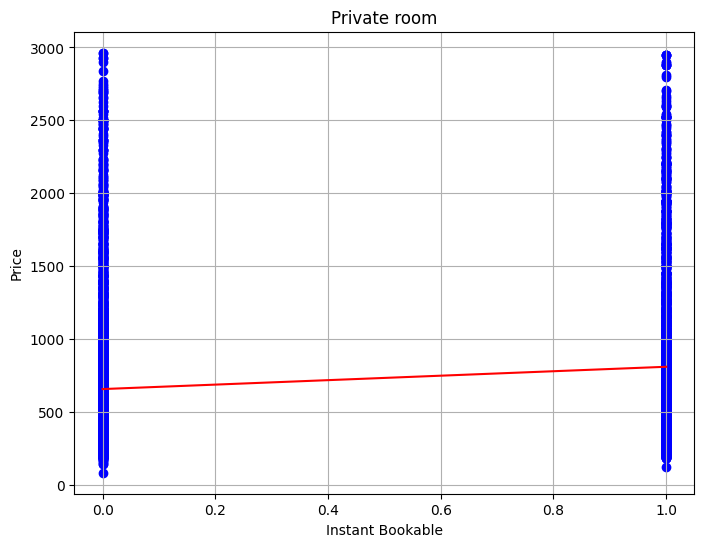

In [853]:
# Private room
model = LinearRegression()
model.fit(cd_private[['instant_bookable']], cd_private['price'])
plt.figure(figsize=(8, 6))
plt.scatter(cd_private[['instant_bookable']], cd_private['price'], color='blue')
plt.plot(cd_private[['instant_bookable']], model.predict(cd_private[['instant_bookable']]), color='red')
plt.title('Private room')
plt.xlabel('Instant Bookable')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [854]:
# Obtenemos los parámetros
m = model.coef_
b = model.intercept_
print('Pendiente:', m)
print('Intercepto:', b)

# Entonce, el modelo lineal sería:
print(f'y = {m[0]}x + {b}', end='\n\n')

print('Puntaje del modelo:', model.score(cd_private[['instant_bookable']], cd_private['price']))

Pendiente: [152.97757145]
Intercepto: 656.8053242738001
y = 152.97757145012937x + 656.8053242738001

Puntaje del modelo: 0.025648548989172903


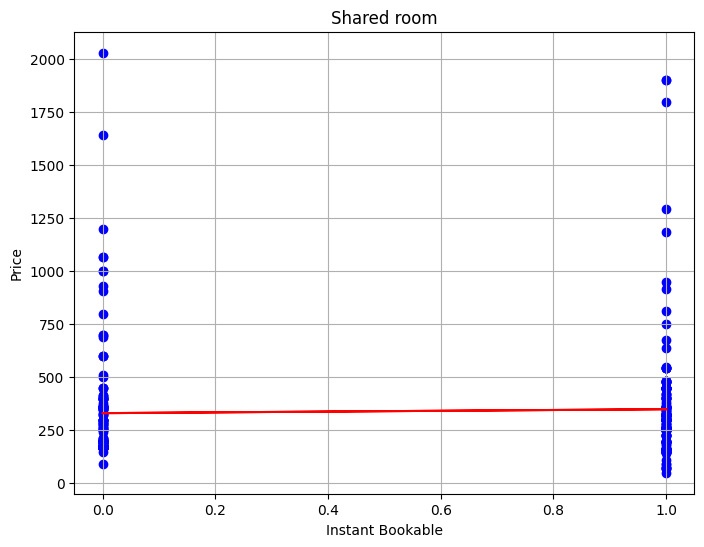

In [855]:
# Shared room
model = LinearRegression()
model.fit(cd_shared[['instant_bookable']], cd_shared['price'])
plt.figure(figsize=(8, 6))
plt.scatter(cd_shared[['instant_bookable']], cd_shared['price'], color='blue')
plt.plot(cd_shared[['instant_bookable']], model.predict(cd_shared[['instant_bookable']]), color='red')
plt.title('Shared room')
plt.xlabel('Instant Bookable')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [856]:
# Obtenemos los parámetros
m = model.coef_
b = model.intercept_
print('Pendiente:', m)
print('Intercepto:', b)

# Entonces, el modelo lineal sería:
print(f'y = {m[0]}x + {b}', end='\n\n')

print('Puntaje del modelo:', model.score(cd_shared[['instant_bookable']], cd_shared['price']))

Pendiente: [18.56228741]
Intercepto: 330.6979166666667
y = 18.56228741496593x + 330.6979166666667

Puntaje del modelo: 0.0012347781354364873


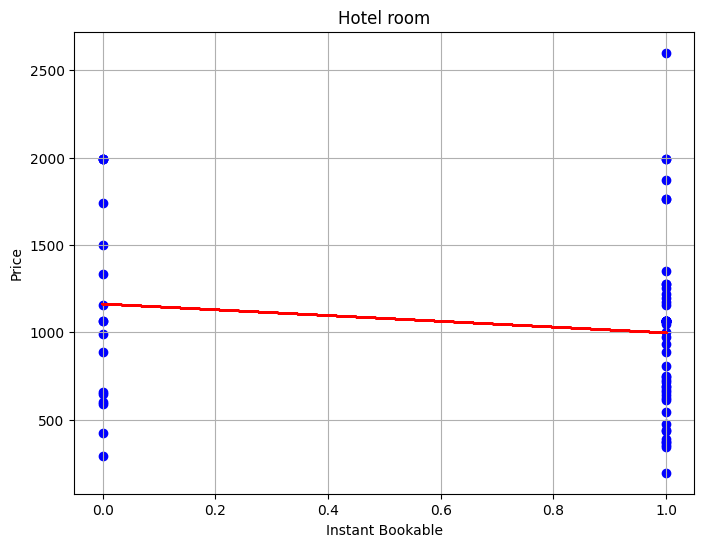

In [857]:
# Hotel room
model = LinearRegression()
model.fit(cd_hotel[['instant_bookable']], cd_hotel['price'])
plt.figure(figsize=(8, 6))
plt.scatter(cd_hotel[['instant_bookable']], cd_hotel['price'], color='blue')
plt.plot(cd_hotel[['instant_bookable']], model.predict(cd_hotel[['instant_bookable']]), color='red')
plt.title('Hotel room')
plt.xlabel('Instant Bookable')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [858]:
# Obtenemos los parámetros
m = model.coef_
b = model.intercept_
print('Pendiente:', m)
print('Intercepto:', b)

# Entonces, el modelo lineal sería:
print(f'y = {m[0]}x + {b}', end='\n\n')

print('Puntaje del modelo:', model.score(cd_hotel[['instant_bookable']], cd_hotel['price']))

Pendiente: [-165.04955717]
Intercepto: 1162.2268518518517
y = -165.04955716586156x + 1162.2268518518517

Puntaje del modelo: 0.021396328842533174


### x = property_type, y = price

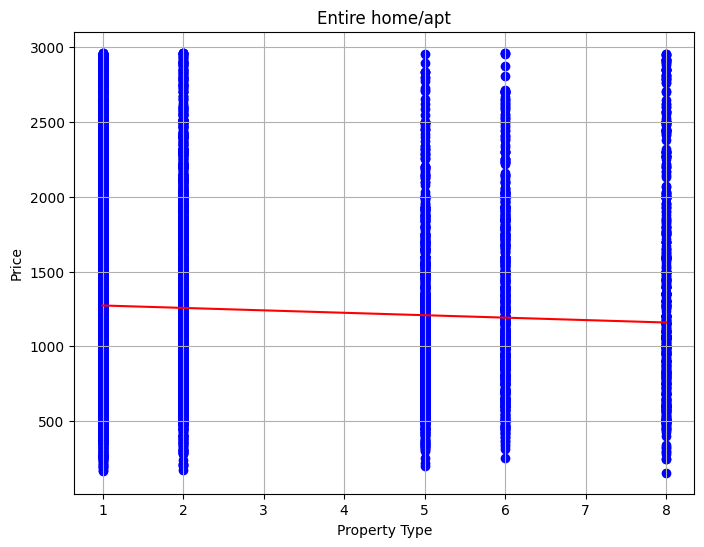

In [859]:
# Hacemos lo mismo, pero ahora con property_type y price

# Entire home/apt
model = LinearRegression()

# Filtramos ny_entire para quitar todos los valores en los que property_type no sea numérico
cd_entire_num = cd_entire[pd.to_numeric(cd_entire['property_type'], errors='coerce').notnull()]

model.fit(cd_entire_num[['property_type']], cd_entire_num['price'])
plt.figure(figsize=(8, 6))
plt.scatter(cd_entire_num[['property_type']], cd_entire_num['price'], color='blue')
plt.plot(cd_entire_num[['property_type']], model.predict(cd_entire_num[['property_type']]), color='red')
plt.title('Entire home/apt')
plt.xlabel('Property Type')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [860]:
# Obtenemos los parámetros
m = model.coef_
b = model.intercept_
print('Pendiente:', m)
print('Intercepto:', b)

# Entonces, el modelo lineal sería:
print(f'y = {m[0]}x + {b}', end='\n\n')

print('Puntaje del modelo:', model.score(cd_entire_num[['property_type']], cd_entire_num['price']))

Pendiente: [-16.27961992]
Intercepto: 1289.5273090661922
y = -16.2796199170824x + 1289.5273090661922

Puntaje del modelo: 0.0034958983828143886


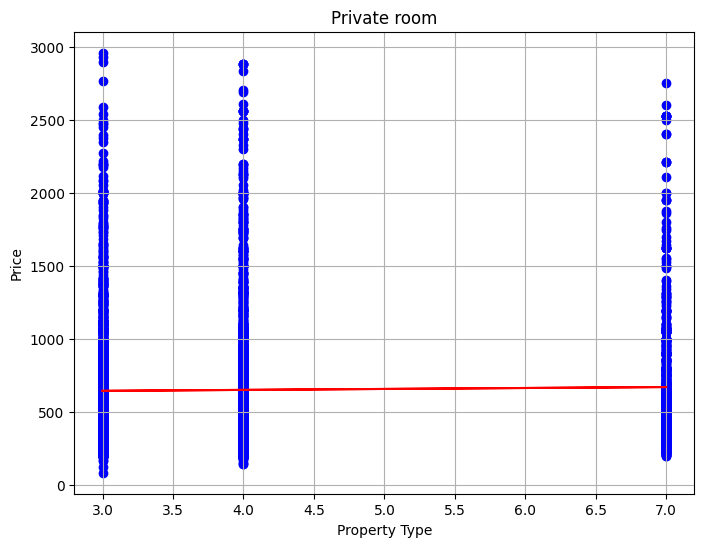

In [861]:
# Private room
model = LinearRegression()
cd_private_num = cd_private[pd.to_numeric(cd_private['property_type'], errors='coerce').notnull()]
model.fit(cd_private_num[['property_type']], cd_private_num['price'])
plt.figure(figsize=(8, 6))
plt.scatter(cd_private_num[['property_type']], cd_private_num['price'], color='blue')
plt.plot(cd_private_num[['property_type']], model.predict(cd_private_num[['property_type']]), color='red')
plt.title('Private room')
plt.xlabel('Property Type')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [862]:
# Obtenemos los parámetros
m = model.coef_
b = model.intercept_
print('Pendiente:', m)
print('Intercepto:', b)

# Entonces, el modelo lineal sería:
print(f'y = {m[0]}x + {b}', end='\n\n')

print('Puntaje del modelo:', model.score(cd_private_num[['property_type']], cd_private_num['price']))

Pendiente: [6.53068343]
Intercepto: 624.1799775273512
y = 6.530683425015836x + 624.1799775273512

Puntaje del modelo: 0.00046912332029702686


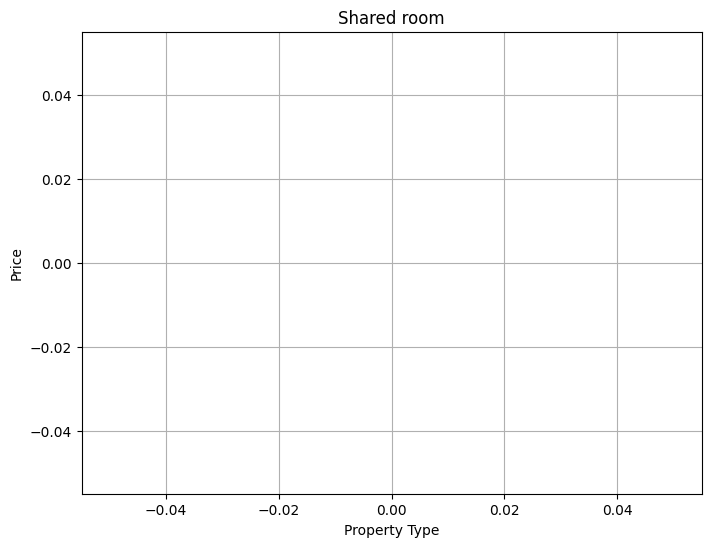

In [863]:
# Shared room
model = LinearRegression()
cd_shared_num = cd_shared[pd.to_numeric(cd_shared['property_type'], errors='coerce').notnull()]
#model.fit(ny_shared[['property_type']], ny_shared['price'])
plt.figure(figsize=(8, 6))
plt.scatter(cd_shared_num[['property_type']], cd_shared_num['price'], color='blue')
#plt.plot(ny_shared[['property_type']], model.predict(ny_shared[['property_type']]), color='red')
plt.title('Shared room')
plt.xlabel('Property Type')
plt.ylabel('Price')
plt.grid(True)
plt.show()

# Paraece que ninguna de las habitaciones compartidas tiene property_type de los 6 más comunes

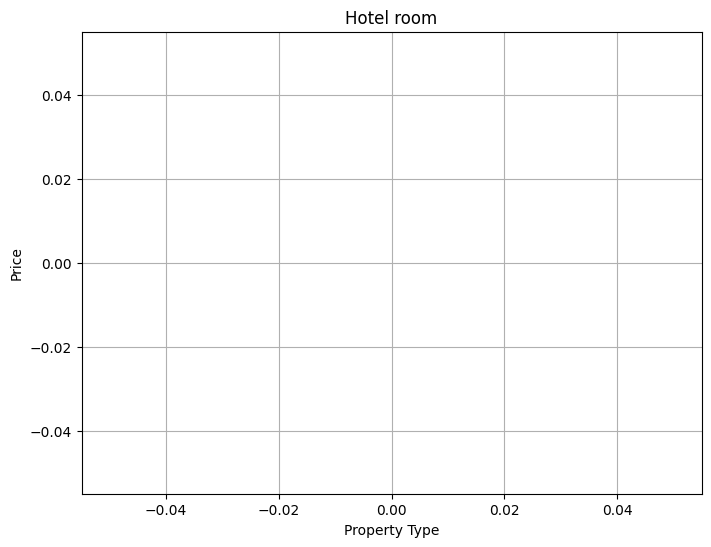

In [864]:
# Hotel room
model = LinearRegression()
cd_hotel_num = cd_hotel[pd.to_numeric(cd_hotel['property_type'], errors='coerce').notnull()]
#model.fit(cd_hotel[['property_type']], cd_hotel['price'])
plt.figure(figsize=(8, 6))
plt.scatter(cd_hotel_num[['property_type']], cd_hotel_num['price'], color='blue')
#plt.plot(cd_hotel[['property_type']], model.predict(cd_hotel[['property_type']]), color='red')
plt.title('Hotel room')
plt.xlabel('Property Type')
plt.ylabel('Price')
plt.grid(True)
plt.show()
# Parece que ninguna de las habitaciones tiene un tipo de propiedad de las 6 más comunes

In [865]:
# # Obtenemos los parámetros
# m = model.coef_
# b = model.intercept_
# print('Pendiente:', m)
# print('Intercepto:', b)

# # Entonces, el modelo lineal sería:
# print(f'y = {m[0]}x + {b}', end='\n\n')

# print('Puntaje del modelo:', model.score(cd_hotel_num[['property_type']], cd_hotel_num['price']))

### Tablas

En CDMX, el modelo que obtuvo el mayor puntaje fue el de hotel room con respecto a la variable review_scores_cleanliness y price, con 0.07459692800770701.

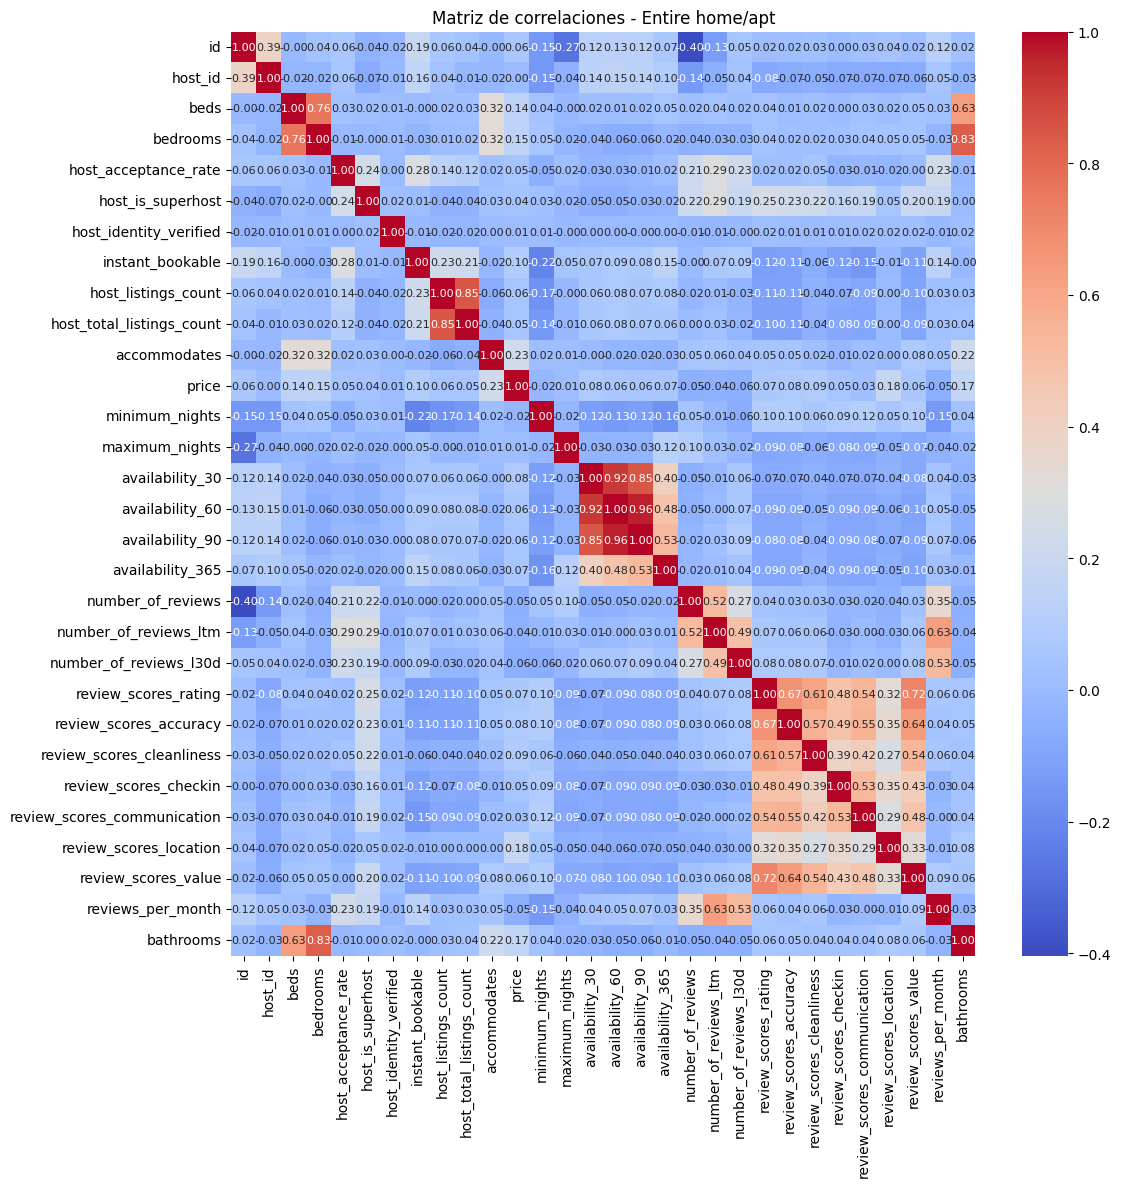

In [866]:
# Hacemos una matriz de correlaciones para cada tipo de habitación, usando todas las variables numéricas
# Primero, seleccionamos solo las variables numéricas

# Entire home/apt
matriz = cd_entire.select_dtypes(include=[np.number])
correlaciones = matriz.corr()

plt.figure(figsize=(12, 12))
sns.heatmap(correlaciones, annot=True, cmap='coolwarm', annot_kws={"size": 8}, fmt='.2f')
plt.title('Matriz de correlaciones - Entire home/apt')
plt.show()

En CDMX, el modelo que obtuvo el mayor puntaje fue el de hotel room con respecto a la variable review_scores_cleanliness y price, con 0.07459692800770701.

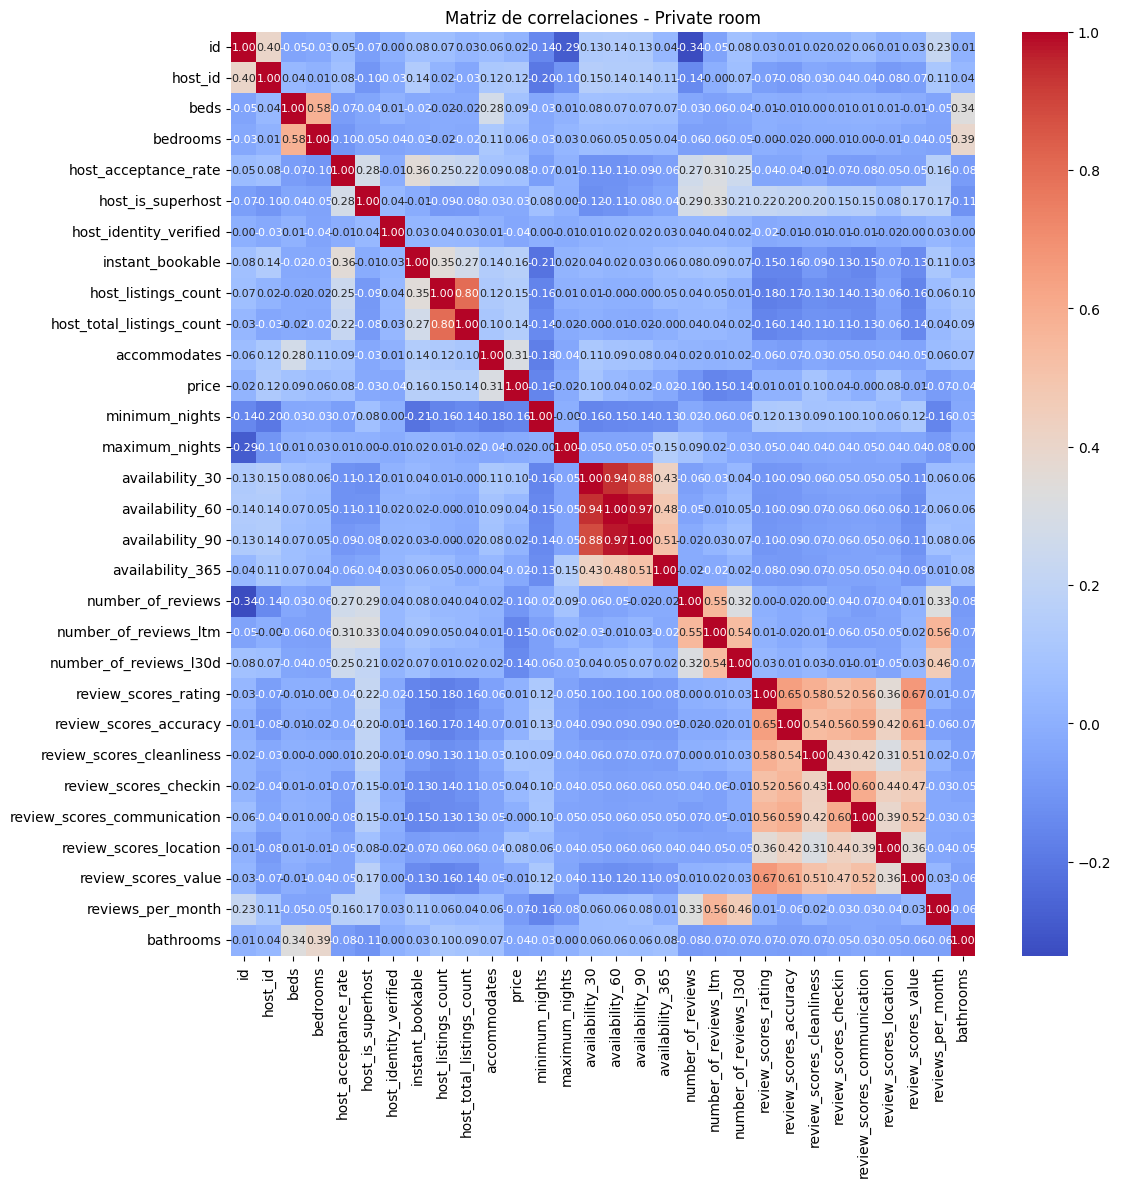

In [867]:
# Ahora con Private room
matriz = cd_private.select_dtypes(include=[np.number])
correlaciones = matriz.corr()

plt.figure(figsize=(12, 12))
sns.heatmap(correlaciones, annot=True, cmap='coolwarm', annot_kws={"size": 8}, fmt='.2f')
plt.title('Matriz de correlaciones - Private room')
plt.show()

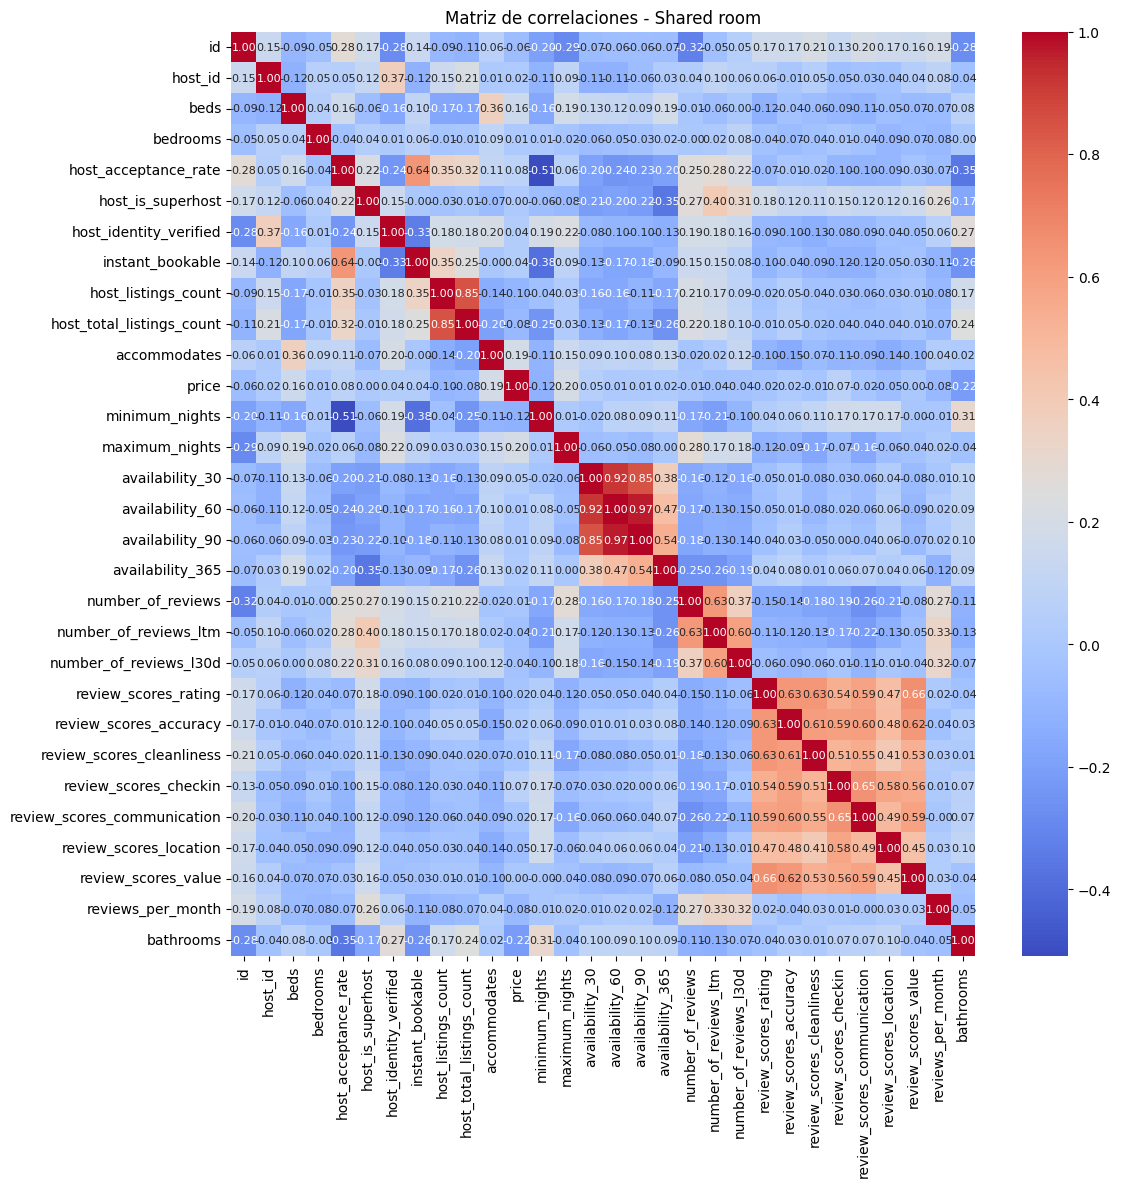

In [868]:
# Ahora con Shared room
matriz = cd_shared.select_dtypes(include=[np.number])
correlaciones = matriz.corr()

plt.figure(figsize=(12, 12))
sns.heatmap(correlaciones, annot=True, cmap='coolwarm', annot_kws={"size": 8}, fmt='.2f')
plt.title('Matriz de correlaciones - Shared room')
plt.show()

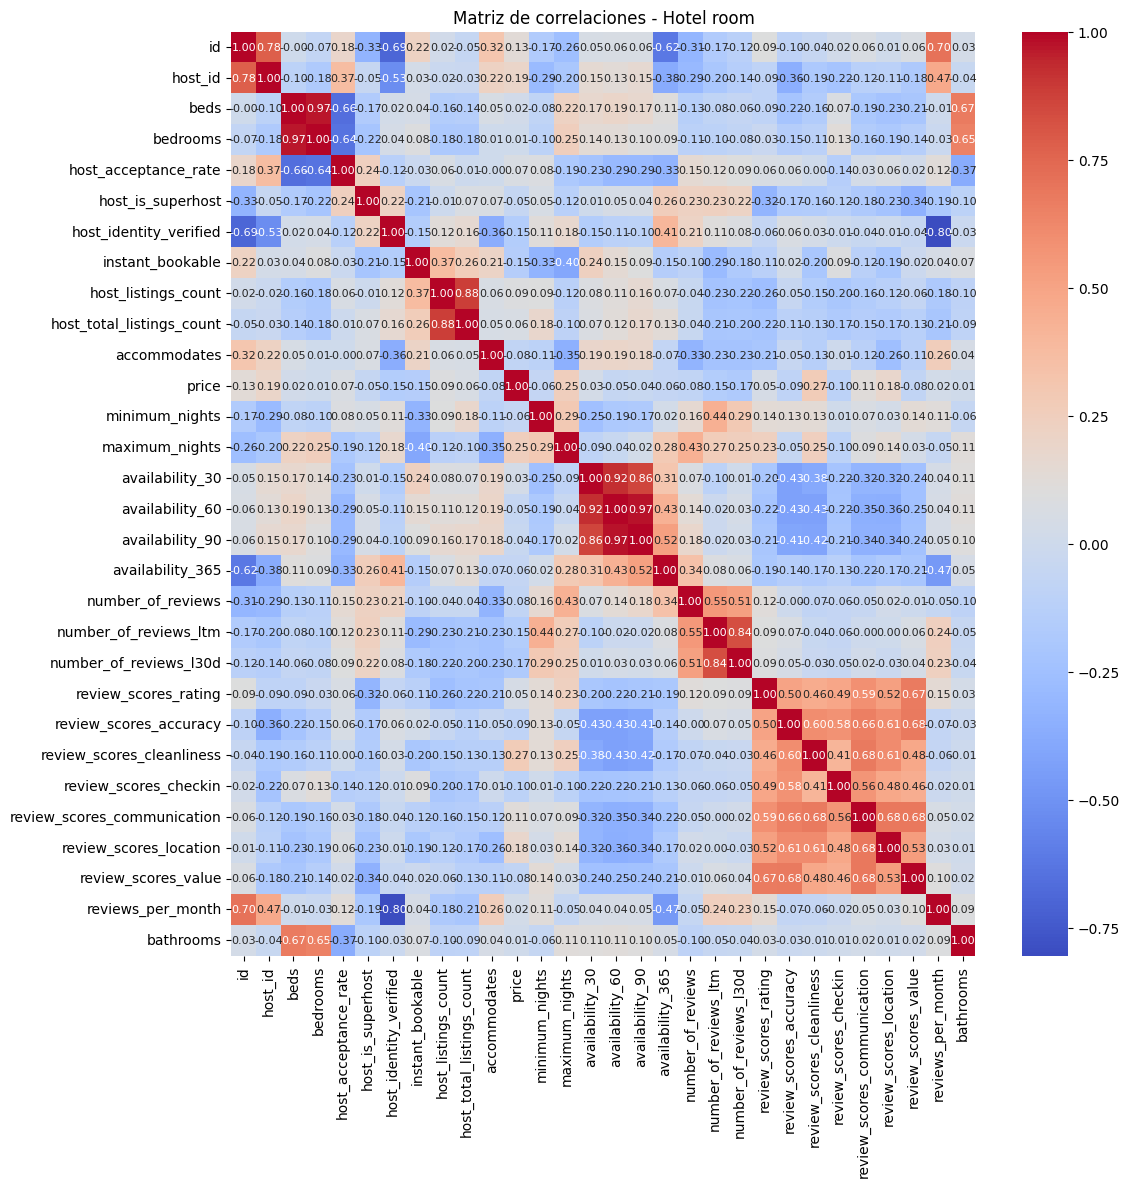

In [869]:
# Ahora con Hotel room
matriz = cd_hotel.select_dtypes(include=[np.number])
correlaciones = matriz.corr()

plt.figure(figsize=(12, 12))
sns.heatmap(correlaciones, annot=True, cmap='coolwarm', annot_kws={"size": 8}, fmt='.2f')
plt.title('Matriz de correlaciones - Hotel room')
plt.show()